In [1]:
!pip install seaborn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [2]:
%matplotlib inline

In [3]:
import pickle

In [4]:
train = pd.read_pickle("train_data.pkl")

In [5]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [6]:
test = pd.read_pickle("test_data.pkl")

In [7]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.953125,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000000,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000000,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,285.000000,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.937500,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
train_sample = train.sample(1000)

In [9]:
train_sample.describe()

/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/opt/c

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,983.0,1000.000000,996.0000,892.00,892.000000,...,230.0000,66.000000,230.0,230.0,7.000,7.000000,7.000000,7.0000,7.00000,125.000000
mean,3.282121e+06,0.027000,7.363410e+06,inf,9885.614000,inf,inf,inf,inf,inf,...,189.2500,14.046875,inf,inf,234.125,14.859375,13.289062,305.2500,146.37500,26.375000
std,1.692746e+05,0.162164,4.581072e+06,inf,4856.114575,inf,11.414062,41.4375,103.25,2.882812,...,30.8125,1.246094,inf,inf,37.750,2.267578,2.138672,81.4375,26.09375,3.666016
min,2.988346e+06,0.000000,1.317350e+05,4.371094,1028.000000,100.0,102.000000,100.0000,110.00,26.000000,...,100.0000,12.000000,100.0,107.0,151.000,14.000000,11.000000,205.0000,102.00000,24.000000
25%,3.135872e+06,0.000000,3.076891e+06,44.875000,6019.000000,205.0,150.000000,166.0000,204.00,87.000000,...,166.0000,13.000000,254.0,256.0,240.000,14.000000,11.000000,263.0000,132.50000,24.000000
50%,3.286908e+06,0.000000,7.413141e+06,75.000000,9901.000000,360.0,150.000000,224.0000,299.00,87.000000,...,166.0000,15.000000,341.0,396.0,252.000,14.000000,15.000000,321.0000,161.00000,24.000000
75%,3.425762e+06,0.000000,1.111920e+07,136.000000,14019.000000,512.0,150.000000,226.0000,330.00,87.000000,...,225.0000,15.000000,507.0,507.0,252.000,14.000000,15.000000,321.0000,164.00000,32.000000
max,3.577312e+06,1.000000,1.580619e+07,5192.000000,18375.000000,600.0,223.000000,236.0000,512.00,96.000000,...,225.0000,17.000000,667.0,643.0,252.000,20.000000,15.000000,442.0000,169.00000,32.000000


In [10]:
cat_cols = [col for col in train.columns if train[col].dtype in ['object']]
train[cat_cols].describe()


,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,590540,588963,588969,496084,137291,319440,319440,319440,309096,240058,...,77565,140282,73289,77805,140985,140985,140985,140985,140810,118666
unique,5,4,4,59,60,2,2,2,3,2,...,75,130,260,4,2,2,2,2,2,1786
top,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,...,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
freq,439670,384767,439938,228355,57147,319415,285468,251731,196405,132491,...,21155,22000,16874,60011,77814,134066,110452,73922,85165,47722


In [11]:
numeric_cols = [col for col in train.columns if train[col].dtype not in ['object']]
train[numeric_cols].describe()

/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/pandas/core/nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/pandas/core/nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/pandas/core/nanops.py:1013: RuntimeWarning: invalid value encountered in scalar divide
  result = sqr.sum(axis=axis, dtype=np.float64) / d
/opt/conda/envs/sagemaker-d

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.0,588975.0,586281.0,524834.0,524834.0,...,139369.0,4.511300e+04,139318.0,139261.0,5159.0,5169.000000,4747.000000,5132.0000,5163.00000,77586.0
mean,3.282270e+06,0.034990,7.372311e+06,NaN,9898.734658,NaN,NaN,NaN,NaN,NaN,...,NaN,inf,NaN,NaN,inf,inf,12.820312,inf,inf,NaN
std,1.704744e+05,0.183755,4.617224e+06,NaN,4901.170153,NaN,0.0,0.0,NaN,0.0,...,0.0,1.561523e+00,NaN,NaN,inf,6.898438,2.371094,97.4375,32.09375,0.0
min,2.987000e+06,0.000000,8.640000e+04,0.250977,1000.000000,100.0,100.0,100.0,100.0,10.0,...,100.0,1.000000e+01,100.0,100.0,100.0,10.000000,11.000000,100.0000,100.00000,0.0
25%,3.134635e+06,0.000000,3.027058e+06,43.312500,6019.000000,214.0,150.0,166.0,204.0,87.0,...,166.0,1.300000e+01,266.0,256.0,252.0,14.000000,11.000000,321.0000,119.00000,24.0
50%,3.282270e+06,0.000000,7.306528e+06,68.750000,9678.000000,361.0,150.0,226.0,299.0,87.0,...,166.0,1.500000e+01,341.0,472.0,252.0,14.000000,11.000000,321.0000,149.00000,24.0
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.0,150.0,226.0,330.0,87.0,...,225.0,1.500000e+01,427.0,533.0,486.5,14.000000,15.000000,371.0000,169.00000,32.0
max,3.577539e+06,1.000000,1.581113e+07,31936.000000,18396.000000,600.0,231.0,237.0,540.0,102.0,...,229.0,2.900000e+01,671.0,661.0,854.0,44.000000,26.000000,548.0000,216.00000,32.0


In [12]:
numeric_cols = [col for col in train.columns if train[col].dtype not in ['object']]
print(numeric_cols)

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V

In [13]:
cat_cols = [col for col in train.columns if train[col].dtype in ['object']]
print(cat_cols)

['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']


In [14]:
with open("similar_cols.txt", "rb") as cl:   # Unpickling
    similar_cols = pickle.load(cl)

In [15]:
train[similar_cols[0]].describe()

/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/pandas/core/nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/pandas/core/nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/pandas/core/nanops.py:1013: RuntimeWarning: invalid value encountered in scalar divide
  result = sqr.sum(axis=axis, dtype=np.float64) / d


,TransactionID,TransactionDT,TransactionAmt
count,5.905400e+05,5.905400e+05,590540.000000
mean,3.282270e+06,7.372311e+06,NaN
std,1.704744e+05,4.617224e+06,NaN
min,2.987000e+06,8.640000e+04,0.250977
25%,3.134635e+06,3.027058e+06,43.312500
50%,3.282270e+06,7.306528e+06,68.750000
75%,3.429904e+06,1.124662e+07,125.000000
max,3.577539e+06,1.581113e+07,31936.000000


##### Transaction Columns

In [16]:
T_cols = similar_cols[0]

In [17]:
T_cols

['TransactionID', 'TransactionDT', 'TransactionAmt']

In [18]:
train[T_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TransactionID   590540 non-null  int32  
 1   TransactionDT   590540 non-null  int32  
 2   TransactionAmt  590540 non-null  float16
dtypes: float16(1), int32(2)
memory usage: 5.6 MB


In [19]:
train['TransactionDT'].isnull().sum()

0

In [20]:
train['TransactionAmt'].isnull().sum()

0

array([[<Axes: title={'center': 'TransactionID'}>,
        <Axes: title={'center': 'TransactionDT'}>],
       [<Axes: title={'center': 'TransactionAmt'}>, <Axes: >]],
      dtype=object)

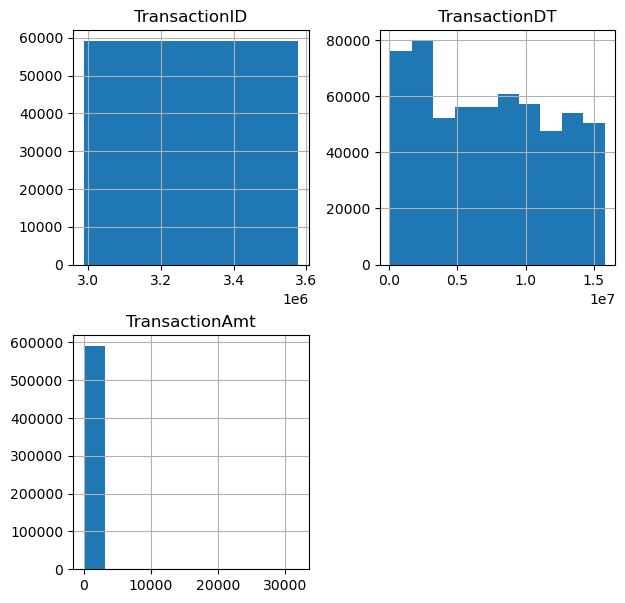

In [21]:
train[T_cols].hist(figsize=(7,7))

<Axes: >

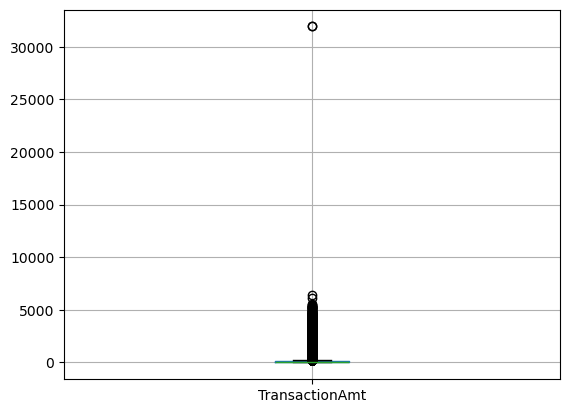

In [22]:
train.boxplot(column="TransactionAmt")

<Axes: xlabel='TransactionAmt', ylabel='Count'>

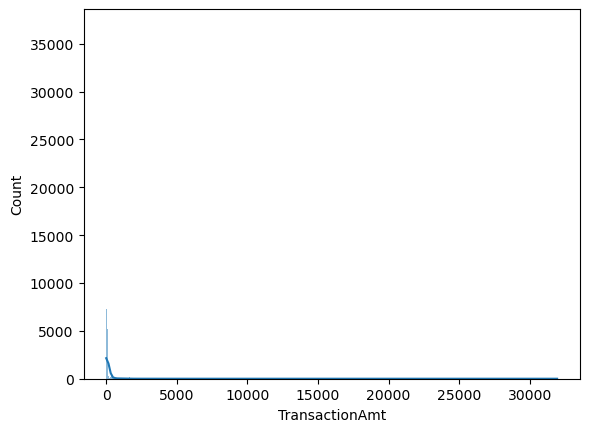

In [23]:
sns.histplot(train['TransactionAmt'],kde=True)

In [24]:
import scipy.stats as stats

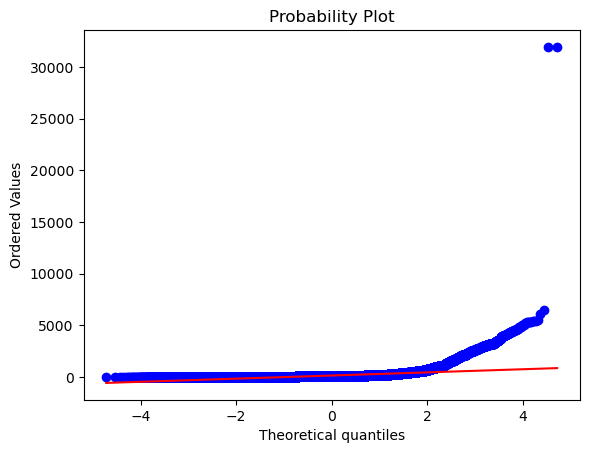

In [25]:
stats.probplot(train['TransactionAmt'],dist="norm",plot=plt)
plt.show()

<Axes: >

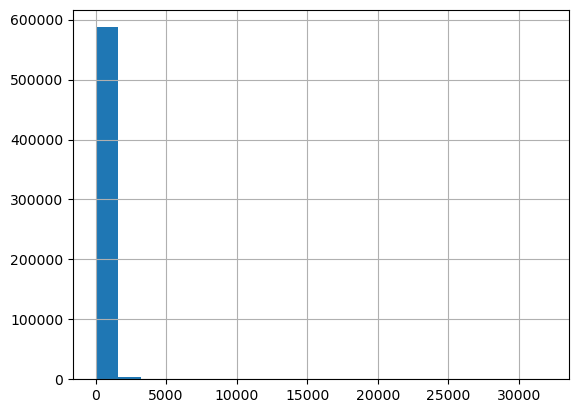

In [26]:
train.TransactionAmt.hist(bins=20)

<Axes: >

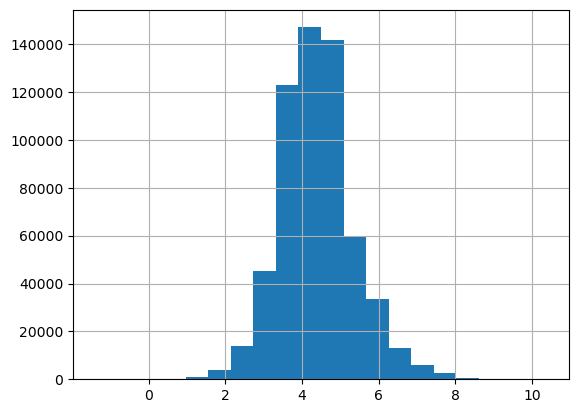

In [27]:
np.log(train.TransactionAmt).hist(bins=20)

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

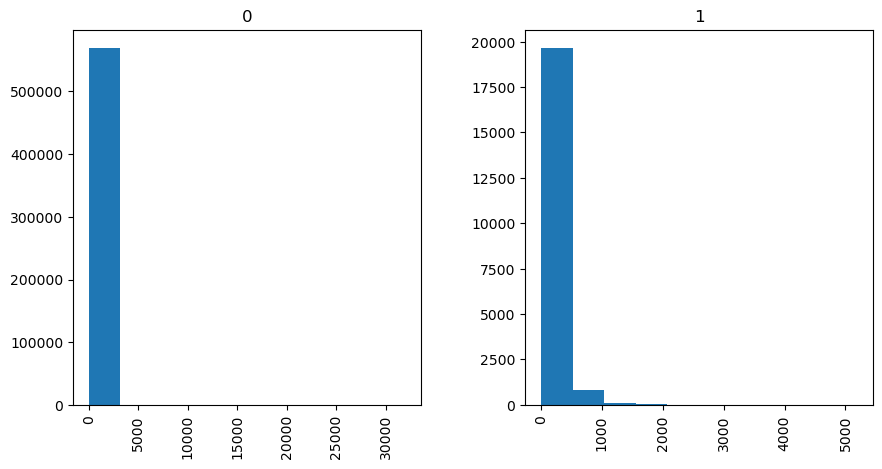

In [28]:
train.hist(column='TransactionAmt', by='isFraud', figsize=(10, 5))

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

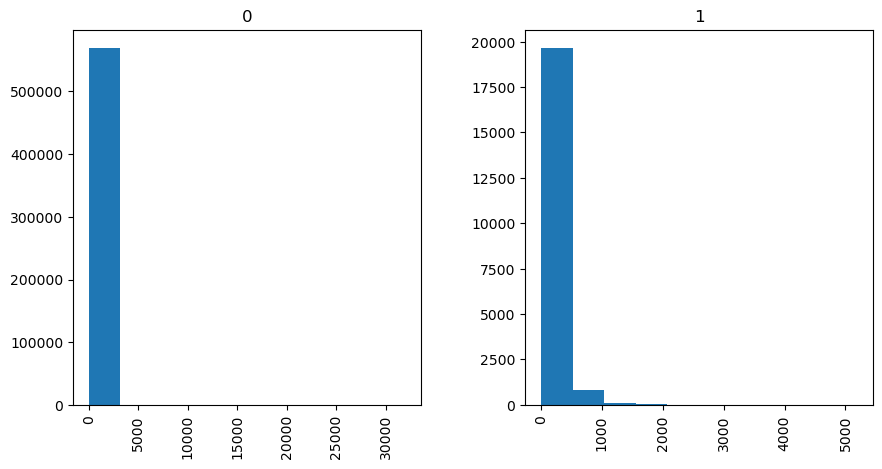

In [29]:
train.hist(column='TransactionAmt', by='isFraud', figsize=(10, 5))

In [30]:
train['TransactionAmt_log'] = np.log(train.TransactionAmt)

/tmp/ipykernel_120/483901802.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['TransactionAmt_log'] = np.log(train.TransactionAmt)


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

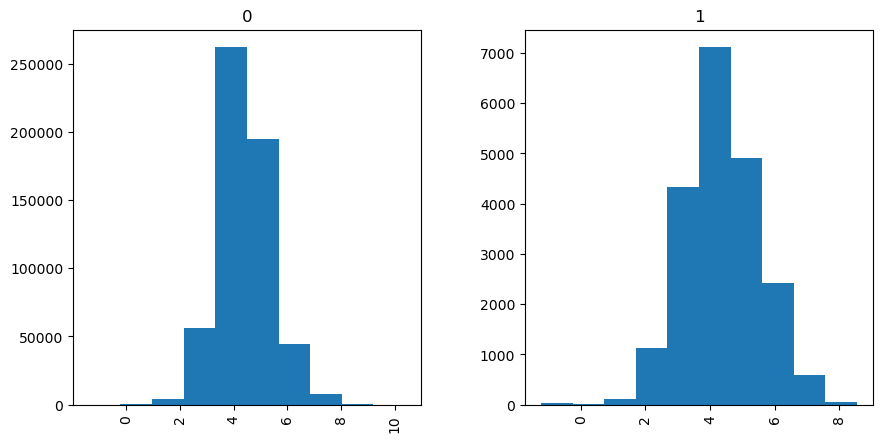

In [31]:
train.hist(column='TransactionAmt_log', by='isFraud', figsize=(10, 5))

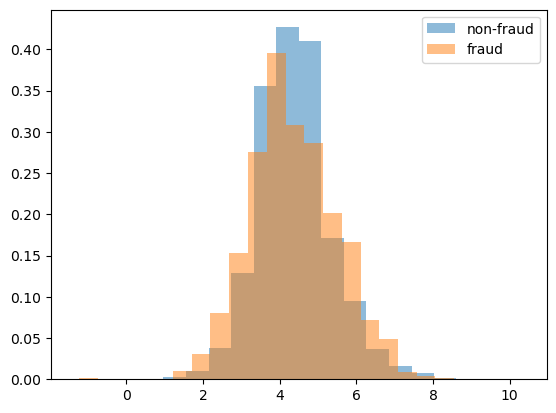

In [32]:
plt.hist(train[train.isFraud==0]['TransactionAmt_log'],bins=20,alpha=0.5,label='non-fraud',density=True)
plt.hist(train[train.isFraud==1]['TransactionAmt_log'],bins=20,alpha=0.5,label='fraud',density=True)
plt.legend(loc='upper right')
plt.show()

<Axes: title={'center': 'TransactionAmt'}, xlabel='isFraud'>

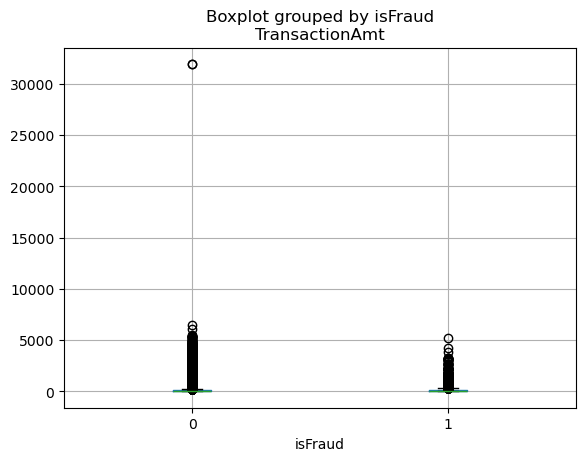

In [33]:
train.boxplot('TransactionAmt',by='isFraud')

<Axes: title={'center': 'TransactionAmt_log'}, xlabel='isFraud'>

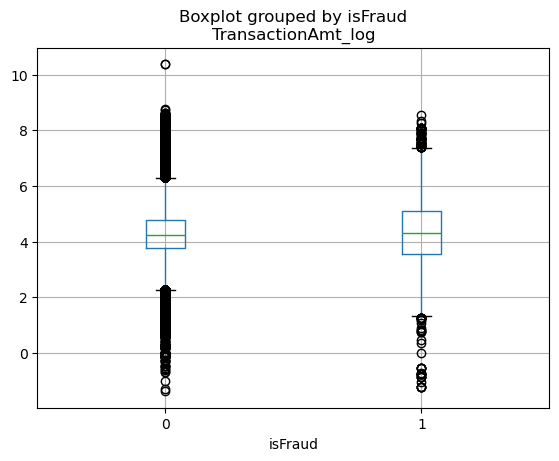

In [34]:
train.boxplot('TransactionAmt_log',by='isFraud')

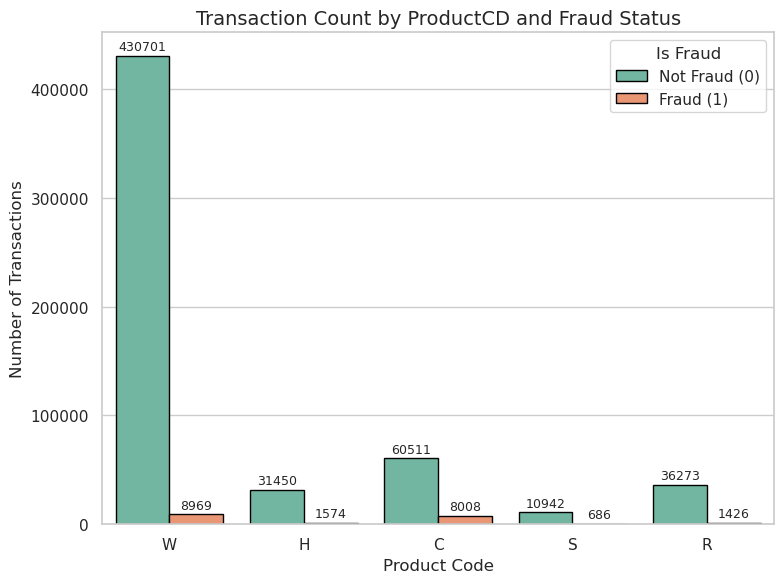

In [35]:
plt.figure(figsize=(8, 6))  # Bigger plot for readability

sns.set(style="whitegrid")  # Clean background

sns.countplot(data=train, x='ProductCD', hue='isFraud', 
              palette='Set2',  # Softer color palette
              edgecolor='black')

plt.title('Transaction Count by ProductCD and Fraud Status', fontsize=14)
plt.xlabel('Product Code', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.legend(title='Is Fraud', labels=['Not Fraud (0)', 'Fraud (1)'])

for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)

plt.tight_layout()
plt.show()


In [36]:
fraud_rate = (train.groupby('ProductCD')['isFraud'].agg(['sum','count']).rename(columns={'sum':'Fraudulent','count':'Total'}))

In [37]:
fraud_rate

,Fraudulent,Total
ProductCD,,
C,8008,68519
H,1574,33024
R,1426,37699
S,686,11628
W,8969,439670


In [38]:
fraud_rate['Fraud Rate %'] = (fraud_rate['Fraudulent']/fraud_rate['Total'])*100 

In [39]:
fraud_rate = fraud_rate.reset_index()

In [40]:
fraud_rate

,ProductCD,Fraudulent,Total,Fraud Rate %
0,C,8008,68519,11.687269
1,H,1574,33024,4.766231
2,R,1426,37699,3.782594
3,S,686,11628,5.899553
4,W,8969,439670,2.039939


/tmp/ipykernel_120/4238773086.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_rate,x='ProductCD',y='Fraud Rate %',palette='Set1')


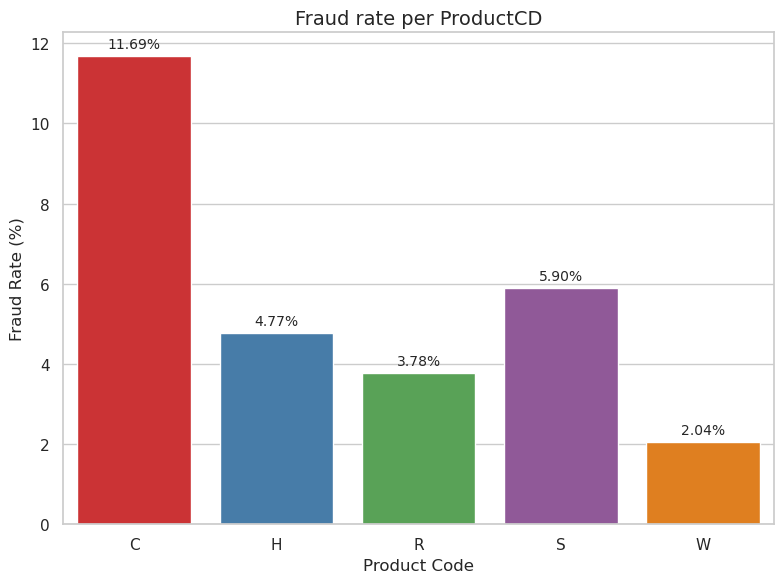

In [41]:
plt.figure(figsize=(8,6))
sns.barplot(data=fraud_rate,x='ProductCD',y='Fraud Rate %',palette='Set1')
plt.title('Fraud rate per ProductCD',fontsize=14)
plt.xlabel('Product Code', fontsize=12)
plt.ylabel('Fraud Rate (%)', fontsize=12)
for index, row in fraud_rate.iterrows():
    plt.text(index, row['Fraud Rate %'] + 0.2, f"{row['Fraud Rate %']:.2f}%", 
             ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [42]:
train['TransactionID'].nunique()

590540

#### TransactionID is index key

In [43]:
train.TransactionID.nunique(),len(train)

(590540, 590540)

In [44]:
train.TransactionDT.head(20)

0     86400
1     86401
2     86469
3     86499
4     86506
5     86510
6     86522
7     86529
8     86535
9     86536
10    86549
11    86555
12    86564
13    86585
14    86596
15    86618
16    86620
17    86668
18    86725
19    86730
Name: TransactionDT, dtype: int32

In [45]:
def make_day_feature(df, offset=0, tname='TransactionDT'):
    days = df[tname] / (3600*24)        
    encoded_days = np.floor(days-1+offset) % 7
    return encoded_days


In [46]:
def make_hour_feature(df, tname='TransactionDT'):
    hours = df[tname] / (3600)        
    encoded_hours = np.floor(hours) % 24
    return encoded_hours

In [47]:
train['Transaction_day'] = make_day_feature(train)

/tmp/ipykernel_120/3121098870.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['Transaction_day'] = make_day_feature(train)


In [48]:
train1 = train.copy()

In [161]:
train['Transaction_hour'] = make_hour_feature(train)

/tmp/ipykernel_120/2218770961.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['Transaction_hour'] = make_hour_feature(train)


In [50]:
train1['Transaction_day'] = make_day_feature(train1)

In [51]:
train1.tail(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,TransactionAmt_log,Transaction_day,Transaction_hour
590535,3577535,0,15811047,49.000000,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892578,6.0,23.0
590536,3577536,0,15811049,39.500000,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.675781,6.0,23.0
590537,3577537,0,15811079,30.953125,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.431641,6.0,23.0
590538,3577538,0,15811088,117.000000,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.761719,6.0,23.0
590539,3577539,0,15811131,280.000000,W,15066,170.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.636719,6.0,23.0


In [52]:
hourly_fraud = train1.groupby('Transaction_hour')['isFraud'].mean().sort_values(ascending=False)

In [53]:
hourly_fraud

Transaction_hour
7.0     0.106102
8.0     0.093014
9.0     0.089956
6.0     0.077743
5.0     0.070302
10.0    0.053212
4.0     0.051890
11.0    0.038816
3.0     0.038314
2.0     0.037483
23.0    0.036997
18.0    0.035231
19.0    0.034738
20.0    0.034273
21.0    0.034005
22.0    0.032694
17.0    0.031530
0.0     0.031380
1.0     0.031314
12.0    0.030439
16.0    0.029511
15.0    0.025399
14.0    0.024216
13.0    0.022889
Name: isFraud, dtype: float64

In [54]:
hourly_fraud_display = hourly_fraud.reset_index().rename(columns={
    'Transaction_hour': 'Transaction Hour',
    'isFraud': 'Fraud Rate'
})

In [55]:
hourly_fraud_display

,Transaction Hour,Fraud Rate
0,7.0,0.106102
1,8.0,0.093014
2,9.0,0.089956
3,6.0,0.077743
4,5.0,0.070302
5,10.0,0.053212
6,4.0,0.051890
7,11.0,0.038816
8,3.0,0.038314
9,2.0,0.037483


/tmp/ipykernel_120/1447626959.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_fraud_display, x='Transaction Hour', y='Fraud Rate', palette='viridis')


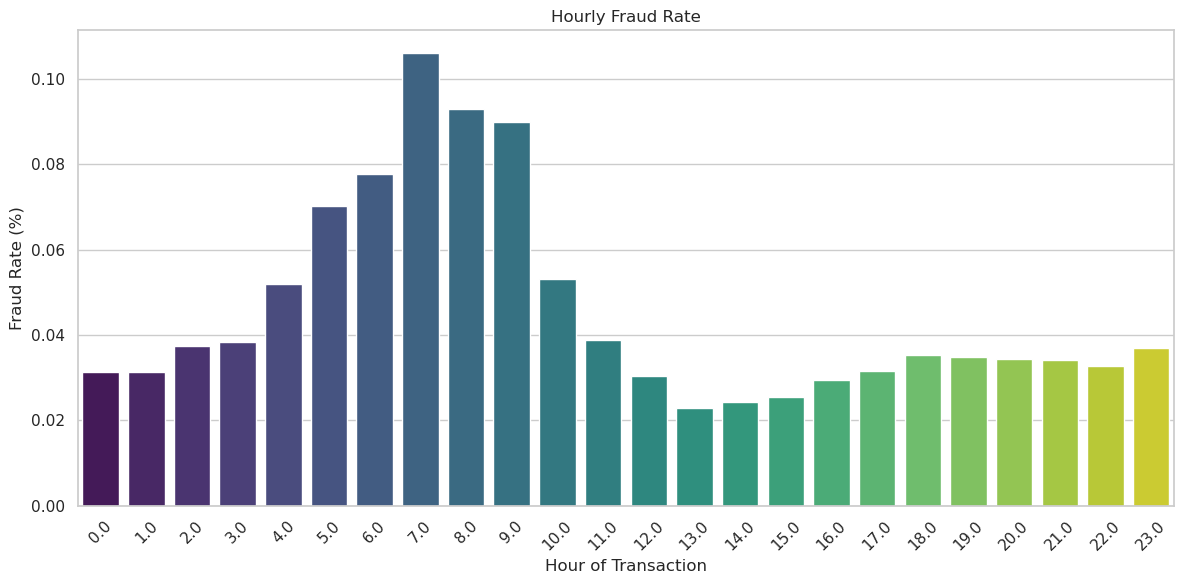

In [56]:
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_fraud_display, x='Transaction Hour', y='Fraud Rate', palette='viridis')
plt.title('Hourly Fraud Rate')
plt.ylabel('Fraud Rate (%)')
plt.xlabel('Hour of Transaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Most of the fraudulent transactions tend to occur between 5th and 9th hour of the day. Notably, the 7th hour shows the highest fraud rate, indicating a potential window where fraud peaks.
 

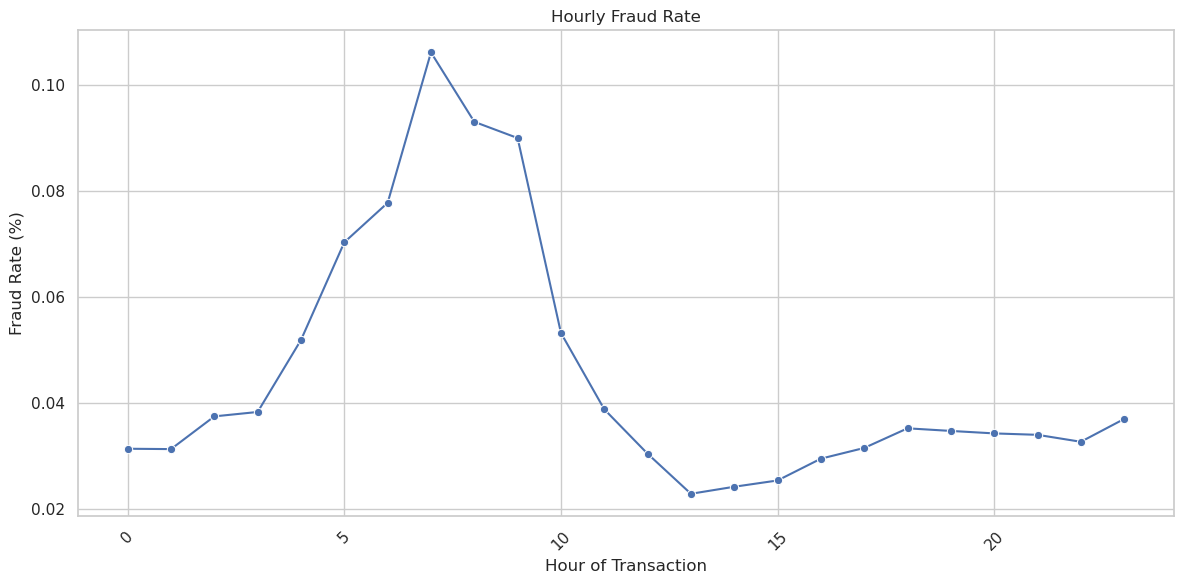

In [57]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_fraud_display, x='Transaction Hour', y='Fraud Rate', marker='o')
plt.title('Hourly Fraud Rate')
plt.ylabel('Fraud Rate (%)')
plt.xlabel('Hour of Transaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [58]:
daily_fraud = train1.groupby('Transaction_day')['isFraud'].mean().sort_values(ascending=False)

In [59]:
daily_fraud_display = daily_fraud.reset_index().rename(columns={
    'Transaction_day': 'Transaction day',
    'isFraud': 'Fraud Rate'
})

In [60]:
daily_fraud_display

,Transaction day,Fraud Rate
0,6.0,0.037174
1,1.0,0.037115
2,0.0,0.036040
3,2.0,0.035644
4,5.0,0.034514
5,4.0,0.033048
6,3.0,0.031452


/tmp/ipykernel_120/3501475225.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_fraud_display, x='Transaction day', y='Fraud Rate', palette='viridis')


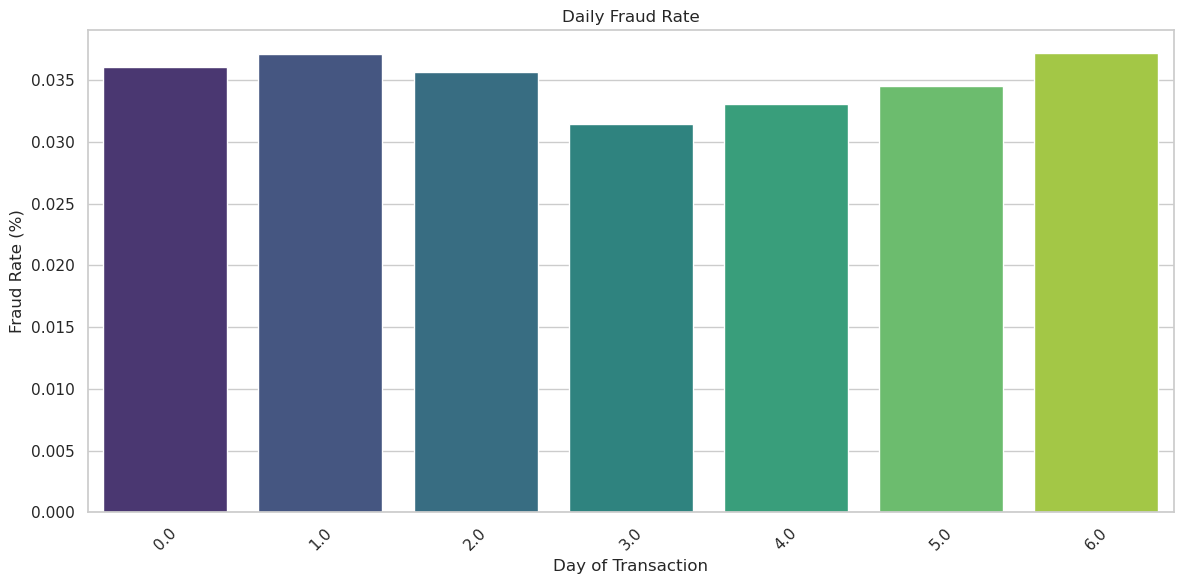

In [61]:
plt.figure(figsize=(12, 6))
sns.barplot(data=daily_fraud_display, x='Transaction day', y='Fraud Rate', palette='viridis')
plt.title('Daily Fraud Rate')
plt.ylabel('Fraud Rate (%)')
plt.xlabel('Day of Transaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Sunday shows the highest fraud rate followed closely by Tuesday and Monday. Thursday has the lowest fraud rate.

#### Card Columns

In [62]:
Card_Cols = similar_cols[1]

In [63]:
Card_Cols

['card1', 'card2', 'card3', 'card4', 'card5', 'card6']

In [64]:
train1[Card_Cols]

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit
...,...,...,...,...,...,...
590535,6550,NaN,150.0,visa,226.0,debit
590536,10444,225.0,150.0,mastercard,224.0,debit
590537,12037,595.0,150.0,mastercard,224.0,debit
590538,7826,481.0,150.0,mastercard,224.0,debit


In [65]:
train[Card_Cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   card1   590540 non-null  int16  
 1   card2   581607 non-null  float16
 2   card3   588975 non-null  float16
 3   card4   588963 non-null  object 
 4   card5   586281 non-null  float16
 5   card6   588969 non-null  object 
dtypes: float16(3), int16(1), object(2)
memory usage: 13.5+ MB


In [66]:
train[Card_Cols].isna().mean()*100

card1    0.000000
card2    1.512683
card3    0.265012
card4    0.267044
card5    0.721204
card6    0.266028
dtype: float64

In [67]:
train.card4.value_counts()

card4
visa                384767
mastercard          189217
american express      8328
discover              6651
Name: count, dtype: int64

In [68]:
card_fraud = train.groupby('card4')['isFraud'].mean().sort_values(ascending=False)

In [69]:
card_fraud_display = card_fraud.reset_index().rename(columns={
    'card4': 'Cards',
    'isFraud': 'Fraud Rate'
})

In [70]:
card_fraud_display

,Cards,Fraud Rate
0,discover,0.077282
1,visa,0.034756
2,mastercard,0.034331
3,american express,0.028698


/tmp/ipykernel_120/2150251342.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=card_fraud_display,x='Cards',y='Fraud Rate',palette='Set1')


KeyError: 'Fraud Rate'

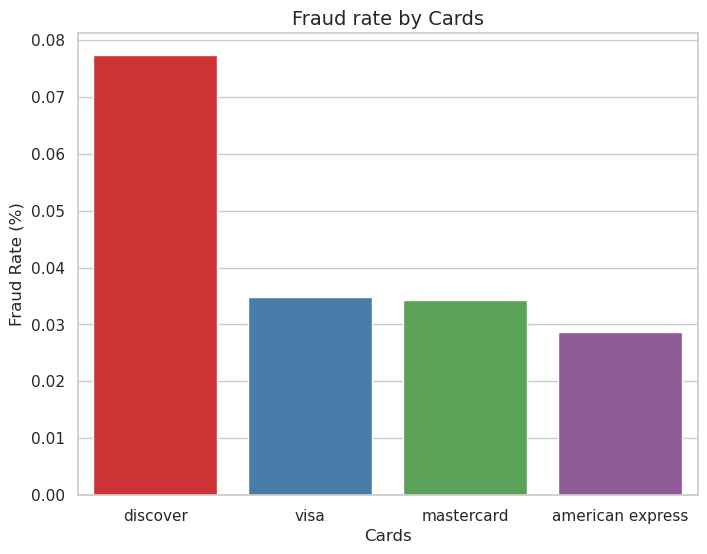

In [71]:
plt.figure(figsize=(8,6))
sns.barplot(data=card_fraud_display,x='Cards',y='Fraud Rate',palette='Set1')
plt.title('Fraud rate by Cards',fontsize=14)
plt.xlabel('Cards', fontsize=12)
plt.ylabel('Fraud Rate (%)', fontsize=12)
for index, row in fraud_rate.iterrows():
    plt.text(index, row['Fraud Rate'] + 0.2, f"{row['Fraud Rate']:.2f}%", 
             ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [72]:
train['card6'].value_counts()

card6
debit              439938
credit             148986
debit or credit        30
charge card            15
Name: count, dtype: int64

In [73]:
train.groupby('card6')['isFraud'].mean().sort_values(ascending=False)

card6
credit             0.066785
debit              0.024263
charge card        0.000000
debit or credit    0.000000
Name: isFraud, dtype: float64

#### Credit card has the highest fraud 

array([[<Axes: title={'center': 'card1'}>,
        <Axes: title={'center': 'card2'}>],
       [<Axes: title={'center': 'card3'}>,
        <Axes: title={'center': 'card5'}>]], dtype=object)

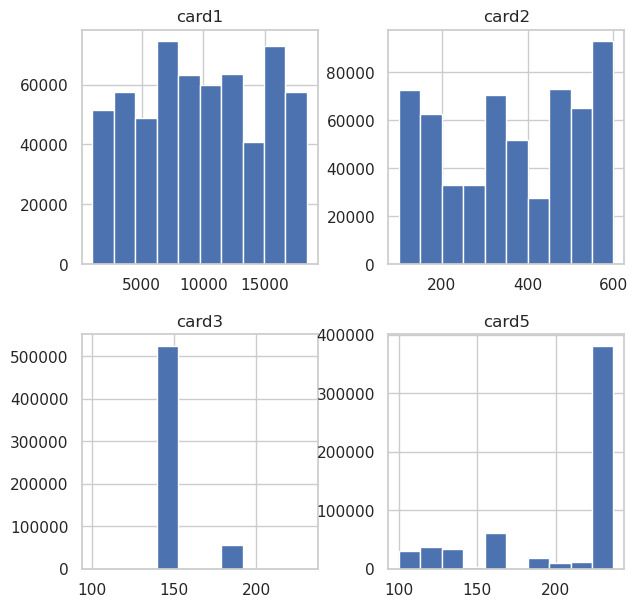

In [74]:
train[Card_Cols].hist(figsize=(7,7))

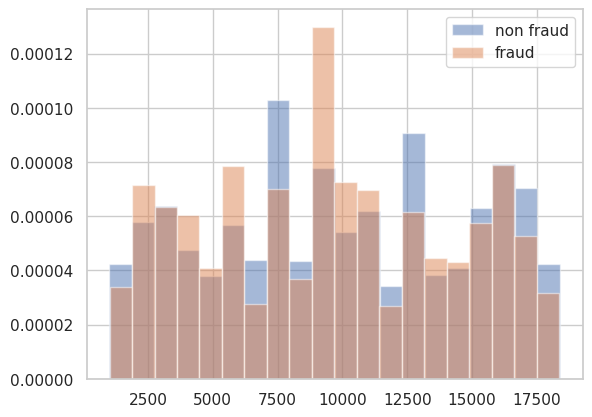

In [75]:
plt.hist(train[train.isFraud==0]['card1'],bins=20,alpha=0.5,label='non fraud',density=True)
plt.hist(train[train.isFraud==1]['card1'],bins=20,alpha=0.5,label='fraud',density=True)
plt.legend(loc='upper right')
plt.show()

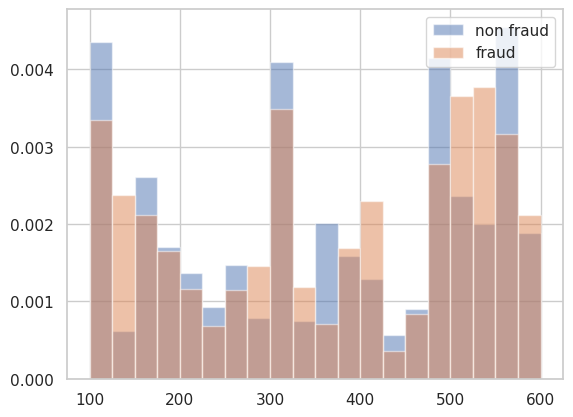

In [76]:
plt.hist(train[train.isFraud==0]['card2'],bins=20,alpha=0.5,label='non fraud',density=True)
plt.hist(train[train.isFraud==1]['card2'],bins=20,alpha=0.5,label='fraud',density=True)
plt.legend(loc='upper right')
plt.show()

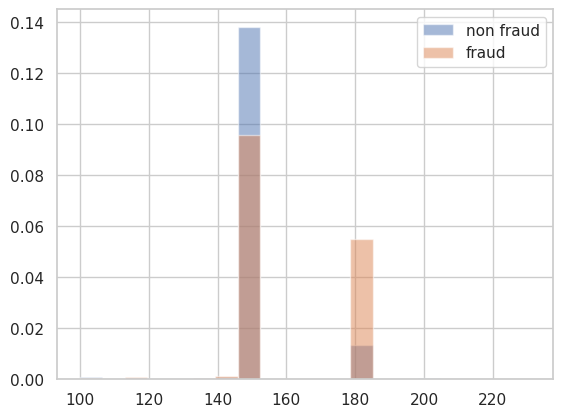

In [77]:
plt.hist(train[train.isFraud==0]['card3'],bins=20,alpha=0.5,label='non fraud',density=True)
plt.hist(train[train.isFraud==1]['card3'],bins=20,alpha=0.5,label='fraud',density=True)
plt.legend(loc='upper right')
plt.show()

In [78]:
train.card3.value_counts()

card3
150.0    521287
185.0     56346
106.0      1571
144.0      1252
146.0      1252
          ...  
170.0         1
125.0         1
164.0         1
201.0         1
173.0         1
Name: count, Length: 114, dtype: int64

<Axes: xlabel='card3', ylabel='Count'>

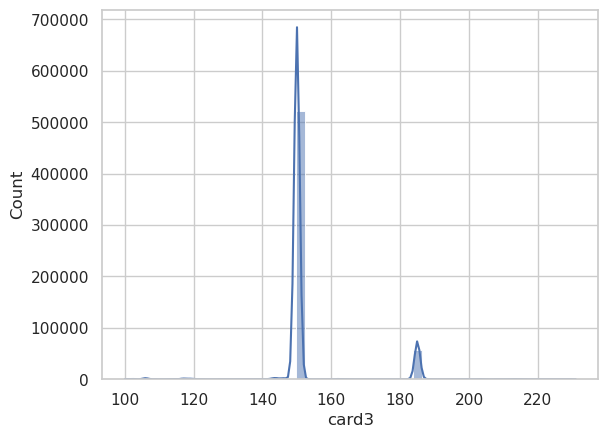

In [79]:
sns.histplot(train['card3'].astype('float32'), kde=True, bins=50)

In [80]:
train1['card3'] = train1['card3'].astype('float32')

In [81]:
card3_frauds = (train1.groupby('card3')['isFraud']
                  .agg(['mean', 'count'])  # compute both fraud rate and count
                  .reset_index()
                  .rename(columns={
                  'card3': 'Card3',
                  'mean': 'Fraud Rate',
                  'count': 'Counts'}).sort_values(by='Fraud Rate', ascending=False))



In [82]:
print(card3_frauds.to_string())

     Card3  Fraud Rate  Counts
19   125.0    1.000000       1
91   206.0    1.000000       2
33   139.0    1.000000       1
50   160.0    1.000000       3
69   181.0    1.000000       3
107  224.0    1.000000       1
64   175.0    1.000000       1
26   132.0    1.000000       1
93   208.0    0.500000       2
78   191.0    0.388889      18
46   155.0    0.333333       3
106  223.0    0.254545      55
56   167.0    0.250000       4
12   118.0    0.235294      17
23   129.0    0.222222       9
48   157.0    0.200000       5
83   198.0    0.193548      31
70   182.0    0.179487      39
113  231.0    0.166667       6
21   127.0    0.142857      28
73   185.0    0.130657   56346
35   142.0    0.125000      40
71   183.0    0.111111       9
102  219.0    0.111111       9
13   119.0    0.093333     750
99   214.0    0.090909      66
57   168.0    0.090909      11
37   144.0    0.089457    1252
27   133.0    0.080000      50
68   180.0    0.076923      13
28   134.0    0.066265     166
34   141

In [83]:
train[train.card3==181]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,TransactionAmt_log,Transaction_day
362936,3349936,1,8994187,50.0,H,13103,277.0,181.0,visa,226.0,...,2208x1242,match_status:1,T,F,F,T,mobile,iOS Device,3.912109,5.0
362938,3349938,1,8994244,50.0,H,13103,277.0,181.0,visa,226.0,...,2208x1242,match_status:1,T,F,F,T,mobile,iOS Device,3.912109,5.0
362941,3349941,1,8994290,50.0,H,13103,277.0,181.0,visa,226.0,...,2208x1242,match_status:1,T,F,F,T,mobile,iOS Device,3.912109,5.0


In [84]:
num_card_cols = ['card1','card2','card3','card5']

In [85]:
train[num_card_cols].corr()

,card1,card2,card3,card5
card1,1.000000,0.004960,0.002965,-0.093633
card2,0.004960,1.000000,0.023816,0.030486
card3,0.002965,0.023816,1.000000,-0.158383
card5,-0.093633,0.030486,-0.158383,1.000000


 ##### Address Columns

In [86]:
addr_cols = similar_cols[2]

In [87]:
addr_cols

['addr1', 'addr2']

In [88]:
train[addr_cols]

,addr1,addr2
0,315.0,87.0
1,325.0,87.0
2,330.0,87.0
3,476.0,87.0
4,420.0,87.0
...,...,...
590535,272.0,87.0
590536,204.0,87.0
590537,231.0,87.0
590538,387.0,87.0


In [89]:
train[addr_cols].isnull().mean()

addr1    0.111264
addr2    0.111264
dtype: float64

array([[<Axes: title={'center': 'addr1'}>,
        <Axes: title={'center': 'addr2'}>]], dtype=object)

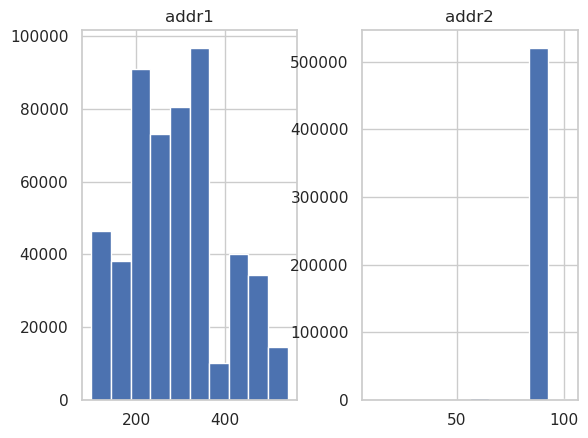

In [90]:
train[addr_cols].hist()

In [91]:
train[addr_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   addr1   524834 non-null  float16
 1   addr2   524834 non-null  float16
dtypes: float16(2)
memory usage: 2.3 MB


In [92]:
train1['addr1'] = train['addr1'].astype('float32')
train1['addr2'] = train['addr2'].astype('float32')

In [93]:
addr1_frauds = (train1.groupby('addr1')['isFraud']
                  .agg(['mean', 'count'])  
                  .reset_index()
                  .rename(columns={
                  'addr1': 'Address1',
                  'mean': 'Fraud Rate',
                  'count': 'Counts'}).sort_values(by='Fraud Rate', ascending=False))

In [94]:
print(addr1_frauds.to_string())

     Address1  Fraud Rate  Counts
157     305.0    0.666667       9
288     483.0    0.565217      23
301     501.0    0.500000       4
279     471.0    0.500000       2
274     466.0    0.500000       2
222     391.0    0.457143      35
248     431.0    0.342105      38
124     260.0    0.333333       6
249     432.0    0.289474      38
87      216.0    0.240741      54
285     479.0    0.230769      13
148     296.0    0.212534     367
227     399.0    0.200000       5
45      161.0    0.194774     421
106     239.0    0.193548      31
264     453.0    0.190476      21
53      171.0    0.166667      12
330     536.0    0.161812     309
243     426.0    0.156250      32
197     356.0    0.133333      90
21      130.0    0.084795     342
273     465.0    0.083499     503
73      199.0    0.076923      13
13      122.0    0.072356    1617
209     374.0    0.071429      14
192     348.0    0.070588      85
160     308.0    0.064894    1279
310     511.0    0.063694     157
108     242.0 

In [95]:
addr2_frauds = (train1.groupby('addr2')['isFraud']
                  .agg(['mean', 'count'])  
                  .reset_index()
                  .rename(columns={
                  'addr2': 'Address2',
                  'mean': 'Fraud Rate',
                  'count': 'Counts'}).sort_values(by='Fraud Rate', ascending=False))

In [96]:
print(addr2_frauds.to_string())

    Address2  Fraud Rate  Counts
65      92.0    1.000000       2
53      75.0    1.000000       1
58      82.0    1.000000       1
29      46.0    1.000000       3
0       10.0    1.000000       8
34      51.0    1.000000       4
24      38.0    0.666667       3
44      65.0    0.536585      82
23      36.0    0.500000       2
36      54.0    0.333333       6
51      73.0    0.200000       5
68      96.0    0.139498     638
46      68.0    0.100000      10
17      29.0    0.090909      11
40      60.0    0.090467    3084
20      32.0    0.065934      91
62      87.0    0.023972  520481
50      72.0    0.000000       6
49      71.0    0.000000       7
48      70.0    0.000000       1
47      69.0    0.000000      17
45      66.0    0.000000       2
43      63.0    0.000000       2
42      62.0    0.000000       4
52      74.0    0.000000       3
54      76.0    0.000000       2
55      77.0    0.000000       1
56      78.0    0.000000       8
57      79.0    0.000000       1
59      83

In [97]:
train[Card_Cols].isnull().mean()

card1    0.000000
card2    0.015127
card3    0.002650
card4    0.002670
card5    0.007212
card6    0.002660
dtype: float64

In [98]:
train[Card_Cols].isnull().sum()

card1       0
card2    8933
card3    1565
card4    1577
card5    4259
card6    1571
dtype: int64

In [99]:
dist_cols = similar_cols[3]

In [100]:
train[dist_cols]

,dist1,dist2
0,19.0,NaN
1,NaN,NaN
2,287.0,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
590535,48.0,NaN
590536,NaN,NaN
590537,NaN,NaN
590538,3.0,NaN


In [101]:
train[dist_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   dist1   238269 non-null  float16
 1   dist2   37627 non-null   float16
dtypes: float16(2)
memory usage: 2.3 MB


In [102]:
train[dist_cols].isnull().mean()

dist1    0.596524
dist2    0.936284
dtype: float64

In [103]:
train[dist_cols].isnull().sum()

dist1    352271
dist2    552913
dtype: int64

array([[<Axes: title={'center': 'dist1'}>,
        <Axes: title={'center': 'dist2'}>]], dtype=object)

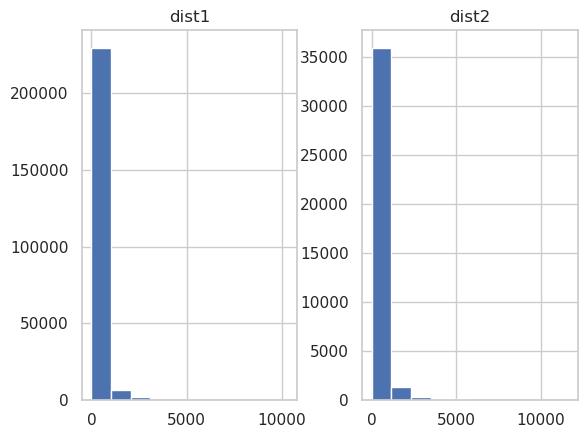

In [104]:
train[dist_cols].hist()

array([[<Axes: title={'center': 'dist1'}>,
        <Axes: title={'center': 'dist2'}>]], dtype=object)

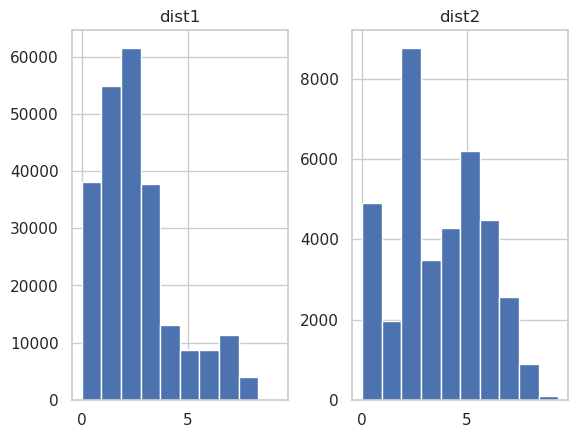

In [105]:
np.log(train[dist_cols]+1).hist()

In [106]:
train.groupby('isFraud').dist1.mean()

isFraud
0    117.360176
1    174.592422
Name: dist1, dtype: float32

In [107]:
train.groupby('isFraud').dist2.mean()

isFraud
0    235.200699
1    201.471725
Name: dist2, dtype: float32

In [108]:
email_cols = similar_cols[4]
email_cols

['P_emaildomain', 'R_emaildomain']

In [109]:
train[email_cols]

,P_emaildomain,R_emaildomain
0,NaN,NaN
1,gmail.com,NaN
2,outlook.com,NaN
3,yahoo.com,NaN
4,gmail.com,NaN
...,...,...
590535,NaN,NaN
590536,gmail.com,NaN
590537,gmail.com,NaN
590538,aol.com,NaN


In [110]:
train[email_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   P_emaildomain  496084 non-null  object
 1   R_emaildomain  137291 non-null  object
dtypes: object(2)
memory usage: 9.0+ MB


#### Analyzing Purchasers email address (P_emaildomain)

In [111]:
train.P_emaildomain.unique()

array([nan, 'gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
       'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
       'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com',
       'earthlink.net', 'hotmail.es', 'cfl.rr.com', 'roadrunner.com',
       'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
       'windstream.net', 'frontier.com', 'outlook.es', 'mac.com',
       'netzero.com', 'aim.com', 'web.de', 'twc.com', 'cableone.net',
       'yahoo.fr', 'yahoo.de', 'yahoo.es', 'sc.rr.com', 'ptd.net',
       'live.fr', 'yahoo.co.uk', 'hotmail.fr', 'hotmail.de',
       'hotmail.co.uk', 'protonmail.com', 'yahoo.co.jp'], dtype=object)

In [112]:
purchasers_email_counts = train.P_emaildomain.value_counts(dropna=False).reset_index().rename(columns={'index':'P_emaildomain','P_emaildomain':'Counts'})
purchasers_email_counts


,Counts,count
0,gmail.com,228355
1,yahoo.com,100934
2,NaN,94456
3,hotmail.com,45250
4,anonymous.com,36998
5,aol.com,28289
6,comcast.net,7888
7,icloud.com,6267
8,outlook.com,5096
9,msn.com,4092


In [113]:
purchaser_email_fraud = train.groupby('P_emaildomain')['isFraud'].agg(['mean','count']).reset_index().rename(columns={'P_emaildomain':'Purchasers email domain','mean' : 'Fraud Rate','count' : 'Counts'}).sort_values(by='Fraud Rate',ascending=False)

In [114]:
purchaser_email_fraud

,Purchasers email domain,Fraud Rate,Counts
38,protonmail.com,0.407895,76
29,mail.com,0.189624,559
36,outlook.es,0.130137,438
0,aim.com,0.126984,315
35,outlook.com,0.094584,5096
21,hotmail.es,0.065574,305
26,live.com.mx,0.054740,749
19,hotmail.com,0.052950,45250
16,gmail.com,0.043542,228355
57,yahoo.fr,0.034965,143


#### There is a significant ratio of Fraud Cases with protonmail. However,the number of cases which uses this email domain is far less than others

#### Analyzing Recipents email address (R_emaildomain)

In [115]:
train.R_emaildomain.unique()

array([nan, 'gmail.com', 'hotmail.com', 'outlook.com', 'anonymous.com',
       'charter.net', 'prodigy.net.mx', 'comcast.net', 'live.com.mx',
       'icloud.com', 'yahoo.com', 'aol.com', 'juno.com', 'att.net',
       'verizon.net', 'yahoo.com.mx', 'bellsouth.net', 'servicios-ta.com',
       'ymail.com', 'hotmail.es', 'msn.com', 'optonline.net', 'live.com',
       'gmx.de', 'aim.com', 'mail.com', 'me.com', 'outlook.es', 'cox.net',
       'earthlink.net', 'embarqmail.com', 'web.de', 'sbcglobal.net',
       'scranton.edu', 'mac.com', 'twc.com', 'roadrunner.com', 'yahoo.fr',
       'yahoo.de', 'yahoo.es', 'frontiernet.net', 'gmail', 'live.fr',
       'q.com', 'yahoo.co.uk', 'windstream.net', 'suddenlink.net',
       'hotmail.fr', 'ptd.net', 'hotmail.de', 'frontier.com',
       'cfl.rr.com', 'hotmail.co.uk', 'netzero.com', 'netzero.net',
       'yahoo.co.jp', 'rocketmail.com', 'centurylink.net',
       'protonmail.com', 'cableone.net', 'sc.rr.com'], dtype=object)

In [116]:
recipents_email_counts = train.R_emaildomain.value_counts(dropna=False).reset_index().rename(columns={'index':'R_emaildomain','R_emaildomain':'Counts'})
recipents_email_counts

,Counts,count
0,NaN,453249
1,gmail.com,57147
2,hotmail.com,27509
3,anonymous.com,20529
4,yahoo.com,11842
...,...,...
56,frontiernet.net,14
57,netzero.com,14
58,centurylink.net,12
59,netzero.net,9


In [117]:
recipents_email_fraud = train.groupby('R_emaildomain')['isFraud'].agg(['mean','count']).reset_index().rename(columns={'R_emaildomain':'Recipient email domain','mean' : 'Fraud Rate','count' : 'Counts'}).sort_values(by='Fraud Rate',ascending=False)

In [118]:
recipents_email_fraud

,Recipient email domain,Fraud Rate,Counts
38,protonmail.com,0.951220,41
29,mail.com,0.377049,122
33,netzero.net,0.222222,9
35,outlook.com,0.165138,2507
36,outlook.es,0.131640,433
23,icloud.com,0.128755,1398
16,gmail.com,0.119184,57147
19,hotmail.com,0.077793,27509
11,earthlink.net,0.075949,79
21,hotmail.es,0.068493,292


#### For recipient's email domain we can see fraud rate with protonmail and another email domain is mail.com

In [119]:
train.P_emaildomain.fillna('missing',inplace=True)

In [120]:
train.R_emaildomain.fillna('missing',inplace=True)

In [121]:
P_email_dict = train.groupby('P_emaildomain')['isFraud'].mean().sort_values(ascending=False).to_dict()

In [122]:
train['P_email_domain_encoded'] = train['P_emaildomain'].map(P_email_dict)

/tmp/ipykernel_120/63657588.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['P_email_domain_encoded'] = train['P_emaildomain'].map(P_email_dict)


In [123]:
R_email_dict = train.groupby('R_emaildomain')['isFraud'].mean().sort_values(ascending=False).to_dict()

In [124]:
train['R_email_domain_encoded'] = train['R_emaildomain'].map(R_email_dict)

/tmp/ipykernel_120/637897251.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['R_email_domain_encoded'] = train['R_emaildomain'].map(R_email_dict)


In [125]:
(train['P_emaildomain'] == train['R_emaildomain']).sum()

185896

In [126]:
C_cols = similar_cols[6]

In [127]:
print(C_cols)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']


In [128]:
train[C_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   C1      590540 non-null  float16
 1   C2      590540 non-null  float16
 2   C3      590540 non-null  float16
 3   C4      590540 non-null  float16
 4   C5      590540 non-null  float16
 5   C6      590540 non-null  float16
 6   C7      590540 non-null  float16
 7   C8      590540 non-null  float16
 8   C9      590540 non-null  float16
 9   C10     590540 non-null  float16
 10  C11     590540 non-null  float16
 11  C12     590540 non-null  float16
 12  C13     590540 non-null  float16
 13  C14     590540 non-null  float16
dtypes: float16(14)
memory usage: 15.8 MB


In [129]:
train[C_cols].apply(pd.Series.value_counts).head(50)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0.0,494.0,443.0,588111.0,451883.0,372435.0,49066.0,523142.0,447667.0,183795.0,453442.0,1864.0,489199.0,35460.0,35947.0
1.0,316791.0,316261.0,2137.0,111817.0,122883.0,341552.0,51966.0,104994.0,228938.0,100231.0,389692.0,76661.0,199337.0,320189.0
2.0,105071.0,103948.0,180.0,12994.0,34776.0,86103.0,7314.0,15927.0,77829.0,14938.0,89677.0,12242.0,57616.0,93843.0
3.0,51315.0,51770.0,58.0,4949.0,13189.0,35490.0,2033.0,5493.0,32505.0,6417.0,34463.0,4185.0,33033.0,44471.0
4.0,28845.0,28251.0,7.0,1902.0,6828.0,17805.0,1109.0,2817.0,16196.0,2836.0,16051.0,1716.0,23704.0,25390.0
5.0,17922.0,16971.0,3.0,851.0,3763.0,10187.0,481.0,1721.0,8648.0,1806.0,9972.0,1085.0,18355.0,15655.0
6.0,10567.0,10682.0,1.0,597.0,2837.0,6048.0,409.0,1774.0,5760.0,1286.0,5966.0,629.0,15127.0,8563.0
7.0,7263.0,7382.0,2.0,372.0,1906.0,3934.0,267.0,988.0,3529.0,817.0,3663.0,393.0,13001.0,5030.0
8.0,5072.0,5105.0,2.0,226.0,1443.0,3048.0,173.0,1790.0,2548.0,627.0,2892.0,262.0,11424.0,3471.0
9.0,3612.0,3750.0,5.0,273.0,1076.0,2335.0,233.0,718.0,1871.0,553.0,1805.0,177.0,10189.0,2651.0


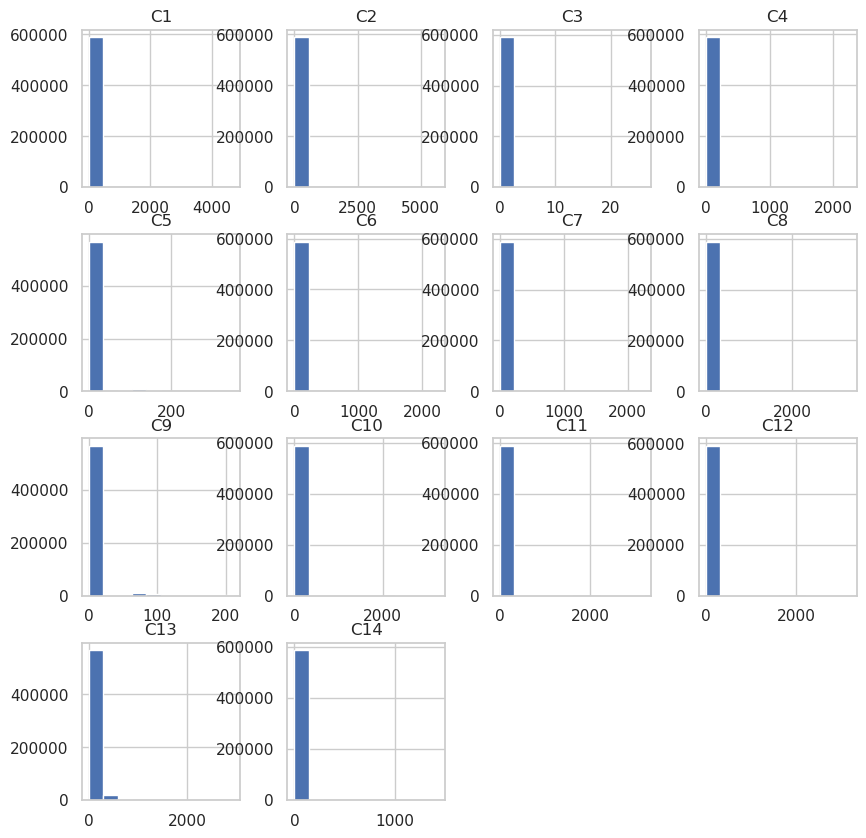

In [130]:
train[C_cols].hist(figsize=(10,10))
plt.show()

In [131]:
transformed = np.cbrt(train[C_cols])

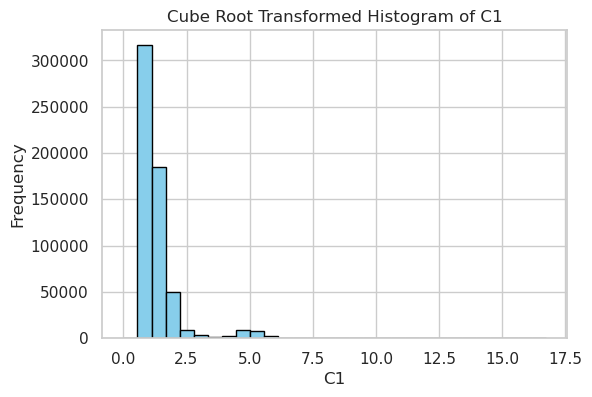

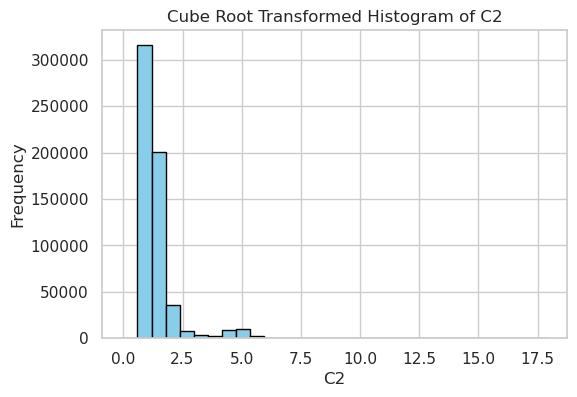

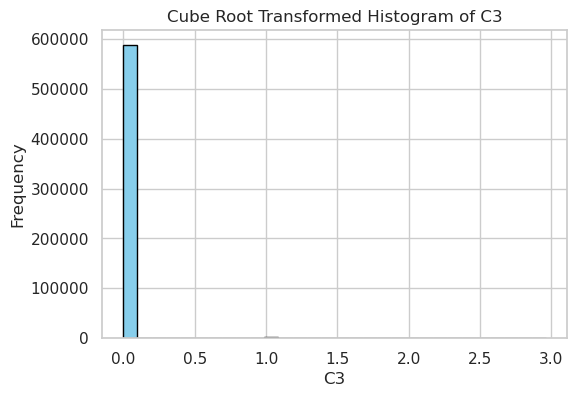

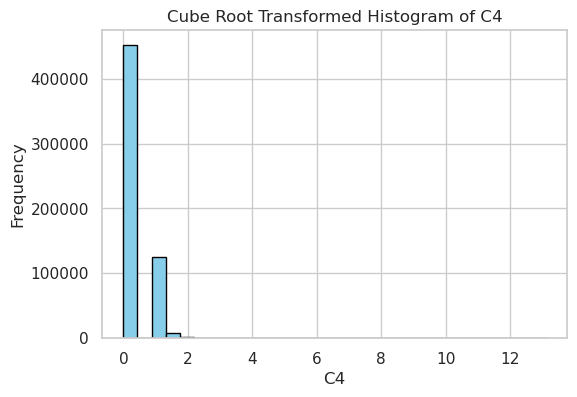

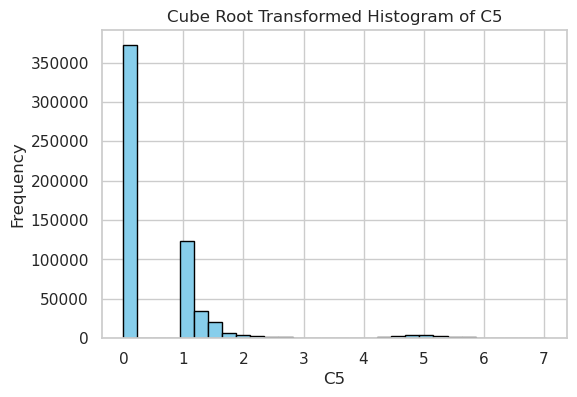

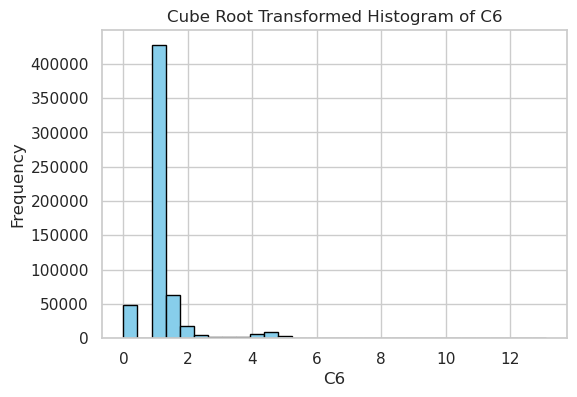

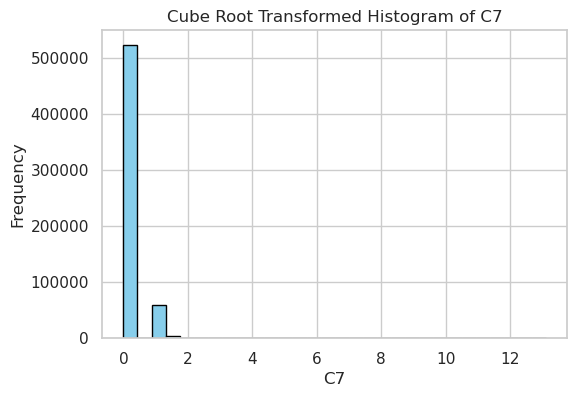

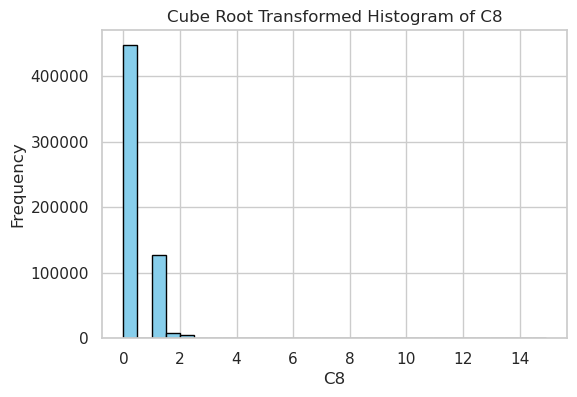

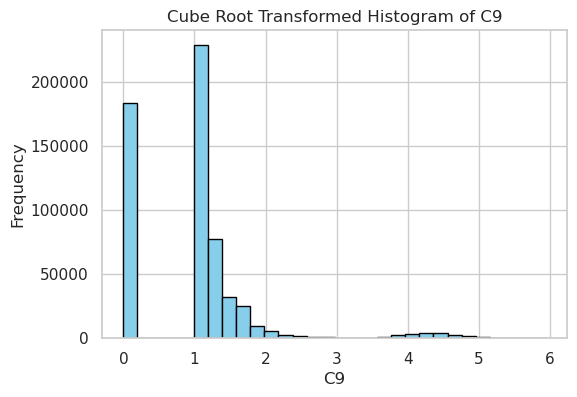

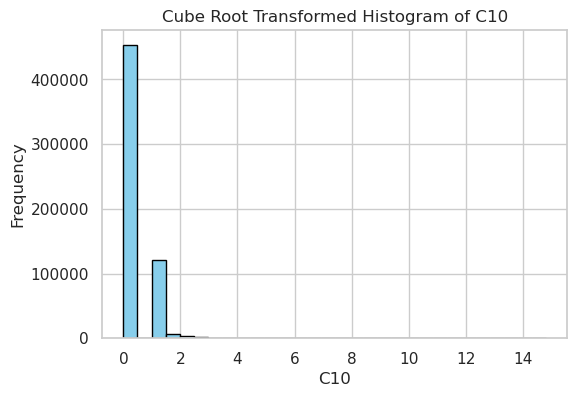

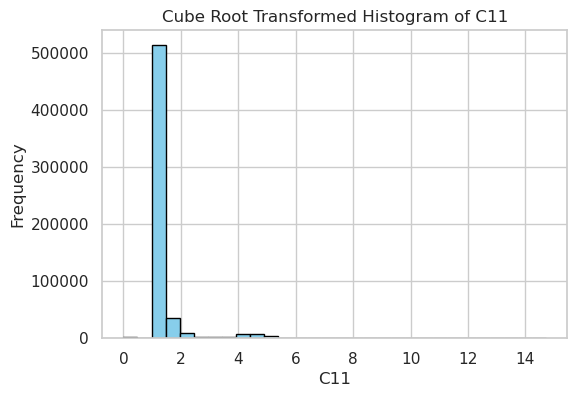

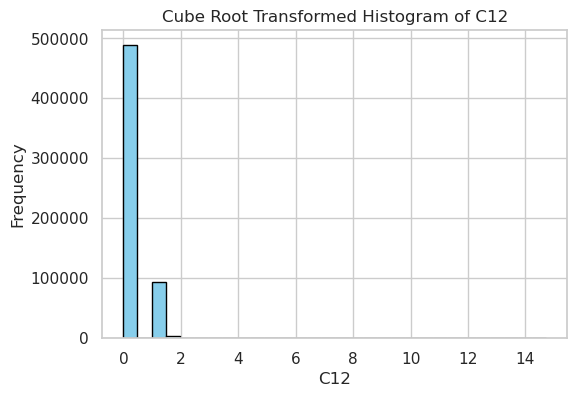

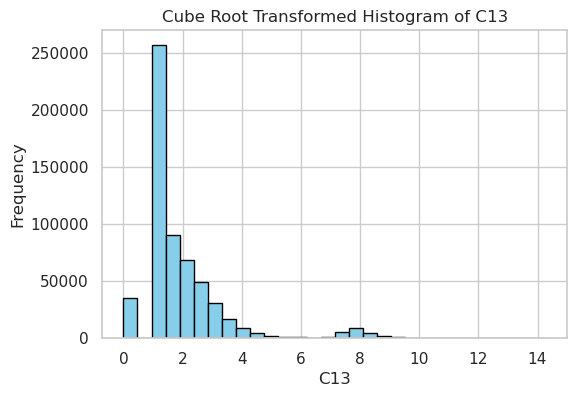

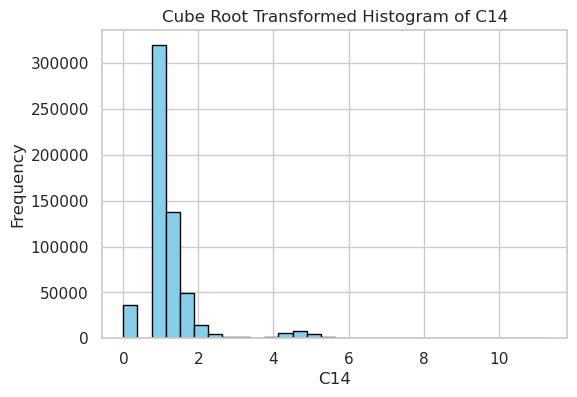

In [132]:
for col in C_cols:
    plt.figure(figsize=(6, 4))
    transformed = np.cbrt(train[col])
    plt.hist(transformed, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Cube Root Transformed Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

<Figure size 600x800 with 0 Axes>

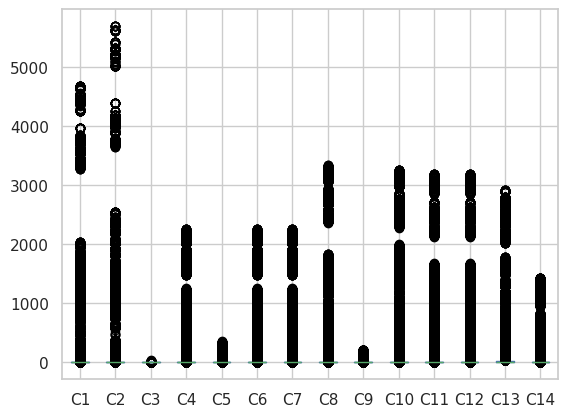

In [134]:
plt.figure(figsize=(6, 8))
train[C_cols].plot.box()
plt.show()

### Next removing outliers and correlation analysis and dropping features with high correlation

In [145]:
def detectoutliers(data, columns, thres):
    data_new = data.copy()
    
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_limit = Q1 - (thres * IQR)
        upper_limit = Q3 + (thres * IQR)

       
        outliers = (data[col] < lower_limit) | (data[col] > upper_limit)
        print(f"{col}: {outliers.sum()} outliers")

    return data_new


In [147]:
df_C_Cols = detectoutliers(train,C_cols,3)

C1: 43588 outliers
C2: 45977 outliers
C3: 2429 outliers
C4: 138657 outliers
C5: 40429 outliers
C6: 50337 outliers
C7: 67398 outliers
C8: 142873 outliers
C9: 30792 outliers
C10: 137098 outliers
C11: 48821 outliers
C12: 101341 outliers
C13: 50055 outliers
C14: 55045 outliers


In [149]:
corr = train[C_cols].corr()

(14.0, 0.0)

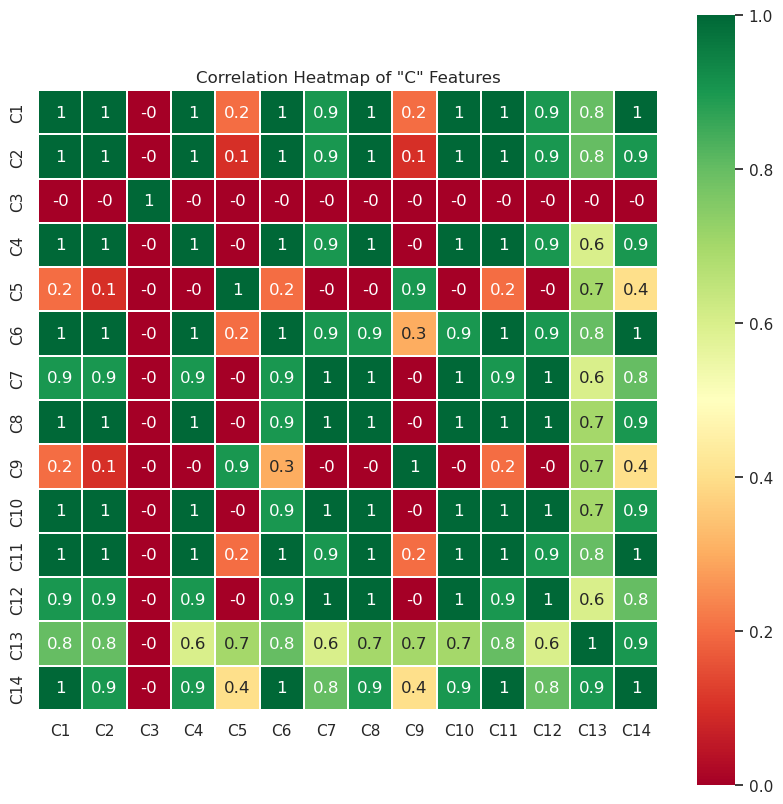

In [150]:
plt.figure(figsize=(10,10))

# Plot heatmap of correlations
ax = sns.heatmap(corr.round(1), linewidths=.2, cmap="RdYlGn", annot=True, square=True)
ax.set_title('Correlation Heatmap of "C" Features')
# ax.get_ylim()
# (13.5, 0.5)
ax.set_ylim(14, 0)

In [151]:
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
    return col_corr


In [158]:
Correlated_C_Cols = correlation(train[C_cols],0.8)
Correlated_C_Cols

{'C10', 'C11', 'C12', 'C13', 'C14', 'C2', 'C4', 'C6', 'C7', 'C8', 'C9'}

In [155]:
def corr_thresh(data, thres):
    corr = data.corr()
    
    # Change the self corelation from "1" to "0"
    for i in range(len(corr)):
        corr.iloc[i, i] = 0
    
    # Stack > select > unstack
    c = corr.stack()
    c_stacked = c[c.abs()>thres]
    c_unstacked = c_stacked.unstack(1)
    
    return c_unstacked

corr_new = corr_thresh(train[C_cols], 0.8)
corr_new.stack().sort_values()

C6   C13    0.808530
C13  C6     0.808530
C10  C14    0.853009
C14  C10    0.853009
C6   C12    0.858182
              ...   
C1   C11    0.996516
C8   C10    0.996970
C10  C8     0.996970
C7   C12    0.999489
C12  C7     0.999489
Length: 92, dtype: float64

In [159]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,TransactionAmt_log,Transaction_day,P_email_domain_encoded,R_email_domain_encoded
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.226562,0.0,0.029538,0.020819
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.367188,0.0,0.043542,0.020819
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.078125,0.0,0.094584,0.020819
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.912109,0.0,0.022757,0.020819
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,3.912109,0.0,0.043542,0.020819


In [169]:
D_cols = similar_cols[7]

In [170]:
D_cols

['D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15']

In [171]:
train[D_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   D1      589271 non-null  float16
 1   D2      309743 non-null  float16
 2   D3      327662 non-null  float16
 3   D4      421618 non-null  float16
 4   D5      280699 non-null  float16
 5   D6      73187 non-null   float16
 6   D7      38917 non-null   float16
 7   D8      74926 non-null   float16
 8   D9      74926 non-null   float16
 9   D10     514518 non-null  float16
 10  D11     311253 non-null  float16
 11  D12     64717 non-null   float16
 12  D13     61952 non-null   float16
 13  D14     62187 non-null   float16
 14  D15     501427 non-null  float16
dtypes: float16(15)
memory usage: 16.9 MB


In [173]:
train[D_cols].isnull().mean()

D1     0.002149
D2     0.475492
D3     0.445149
D4     0.286047
D5     0.524674
D6     0.876068
D7     0.934099
D8     0.873123
D9     0.873123
D10    0.128733
D11    0.472935
D12    0.890410
D13    0.895093
D14    0.894695
D15    0.150901
dtype: float64

In [174]:
train[D_cols].head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0
1,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
2,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0
3,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
train.groupby('isFraud')[D_cols].mean()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
isFraud,,,,,,,,,,,,,,,
0,96.364708,171.956223,28.845358,142.432327,43.491154,72.629044,46.943008,157.345505,0.565847,126.396133,147.808197,55.345787,19.316574,58.152164,166.633133
1,38.711308,77.774208,11.744880,72.102905,13.687776,45.856438,11.292228,49.309425,0.520002,52.363651,87.314445,44.202553,6.492321,54.464577,78.245804


In [178]:
(train[D_cols]<0).sum()

D1      0
D2      0
D3      0
D4     15
D5      0
D6      3
D7      0
D8      0
D9      0
D10     0
D11     7
D12     2
D13     0
D14     3
D15    15
dtype: int64

In [183]:
# Create a boolean mask where any D_col has a negative value
negative_mask = (train[D_cols] < 0).any(axis=1)

# Show only those rows and only D_cols
train.loc[negative_mask, D_cols].head()


,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
2947,0.0,NaN,NaN,-15.0,NaN,NaN,NaN,NaN,NaN,0.0,-15.0,NaN,NaN,NaN,-15.0
3034,450.0,450.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,451.0,29.0,NaN,NaN,NaN,-30.0
3814,120.0,120.0,121.0,NaN,NaN,NaN,NaN,NaN,NaN,121.0,-33.0,NaN,NaN,NaN,363.0
4085,0.0,NaN,NaN,NaN,NaN,NaN,NaN,319.0,0.875,0.0,NaN,NaN,NaN,-193.0,NaN
4097,0.0,NaN,0.0,NaN,NaN,NaN,NaN,319.0,0.875,0.0,NaN,NaN,NaN,-193.0,NaN


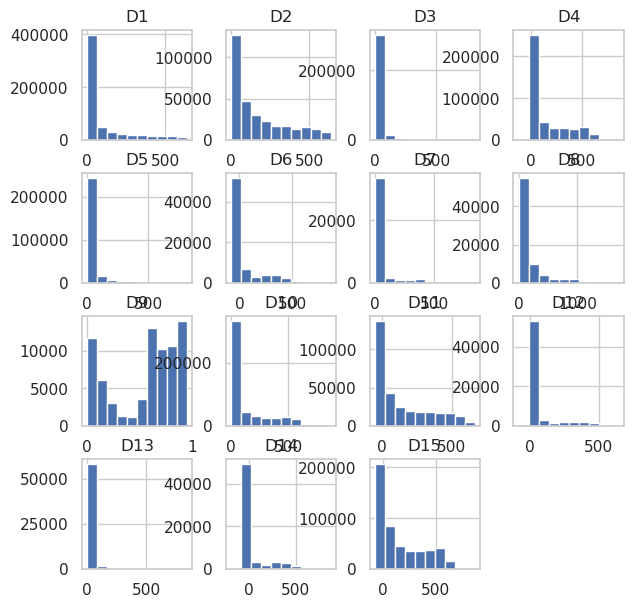

In [184]:
train[D_cols].hist(figsize=(7,7))
plt.show()

In [185]:
Correlated_D_Cols = correlation(train[D_cols],0.8)
Correlated_D_Cols

{'D12', 'D2', 'D6', 'D7'}

In [186]:
D_cols_corr = train[D_cols].corr()

(14.0, 0.0)

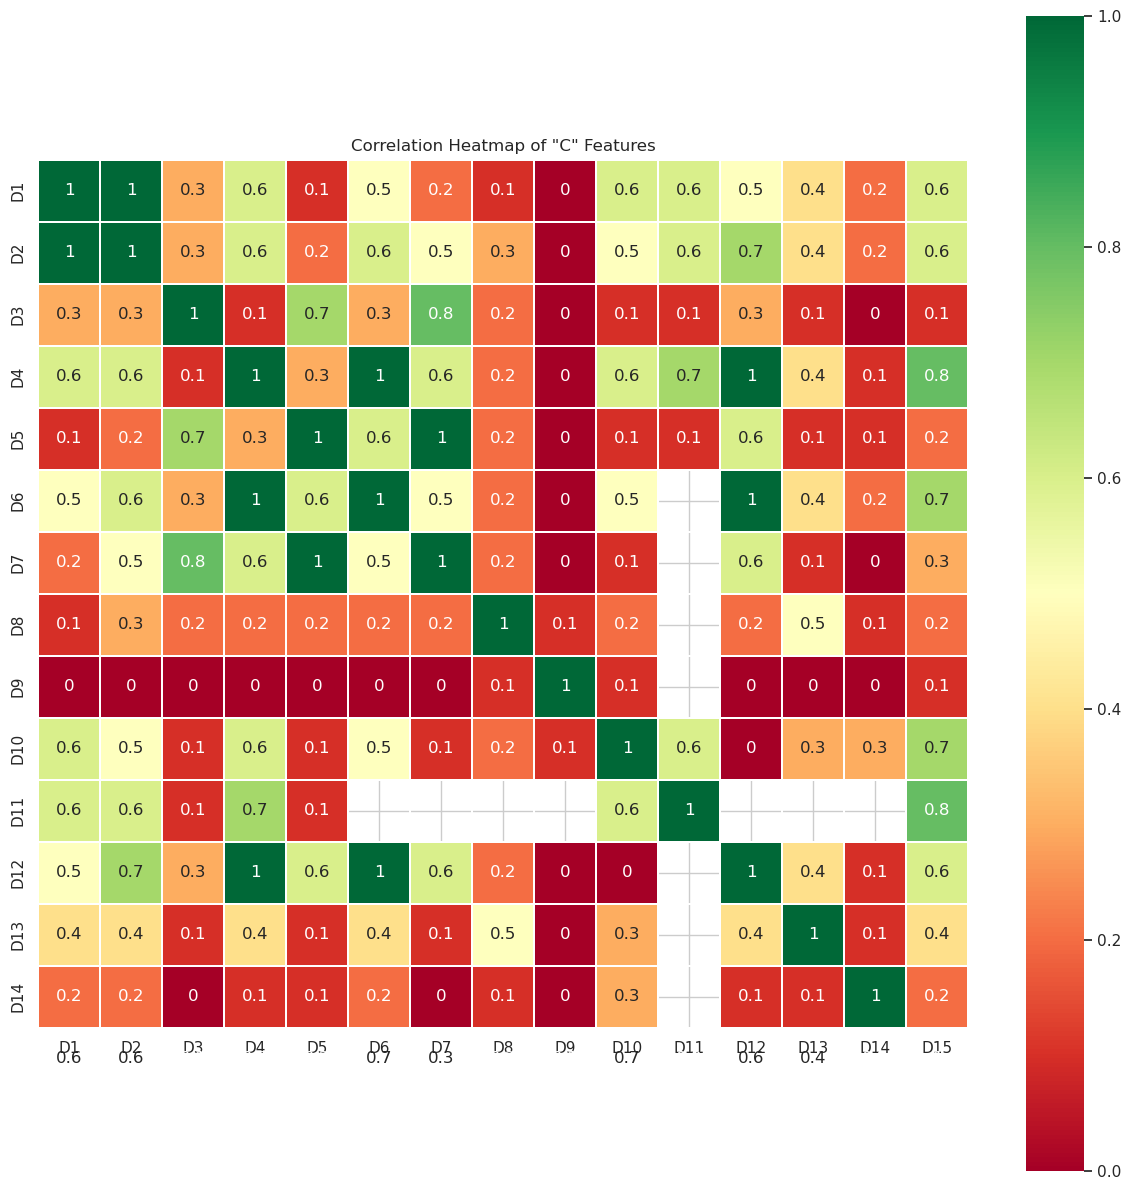

In [188]:
plt.figure(figsize=(15,15))

# Plot heatmap of correlations
ax = sns.heatmap(D_cols_corr.round(1), linewidths=.2, cmap="RdYlGn", annot=True, square=True)
ax.set_title('Correlation Heatmap of "C" Features')
ax.set_ylim(14, 0)

In [189]:
M_Cols = similar_cols[8]
M_Cols

['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

In [191]:
train[M_Cols].describe()

,M1,M2,M3,M4,M5,M6,M7,M8,M9
count,319440,319440,319440,309096,240058,421180,244275,244288,244288
unique,2,2,2,3,2,2,2,2,2
top,T,T,T,M0,F,F,F,F,T
freq,319415,285468,251731,196405,132491,227856,211374,155251,205656


In [202]:
train[M_Cols].isnull().mean()

M1    0.459071
M2    0.459071
M3    0.459071
M4    0.476588
M5    0.593494
M6    0.286788
M7    0.586353
M8    0.586331
M9    0.586331
dtype: float64

In [205]:
V_cols = similar_cols[9]
V_cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122',
 'V123',
 

In [206]:
train[V_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 339 entries, V1 to V339
dtypes: float16(295), float32(44)
memory usage: 431.4 MB


In [208]:
print((train[V_cols].isnull().mean()).to_string())

V1      0.472935
V2      0.472935
V3      0.472935
V4      0.472935
V5      0.472935
V6      0.472935
V7      0.472935
V8      0.472935
V9      0.472935
V10     0.472935
V11     0.472935
V12     0.128819
V13     0.128819
V14     0.128819
V15     0.128819
V16     0.128819
V17     0.128819
V18     0.128819
V19     0.128819
V20     0.128819
V21     0.128819
V22     0.128819
V23     0.128819
V24     0.128819
V25     0.128819
V26     0.128819
V27     0.128819
V28     0.128819
V29     0.128819
V30     0.128819
V31     0.128819
V32     0.128819
V33     0.128819
V34     0.128819
V35     0.286126
V36     0.286126
V37     0.286126
V38     0.286126
V39     0.286126
V40     0.286126
V41     0.286126
V42     0.286126
V43     0.286126
V44     0.286126
V45     0.286126
V46     0.286126
V47     0.286126
V48     0.286126
V49     0.286126
V50     0.286126
V51     0.286126
V52     0.286126
V53     0.130552
V54     0.130552
V55     0.130552
V56     0.130552
V57     0.130552
V58     0.130552
V59     0.1305

In [209]:
train[V_cols].head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [210]:
Correlated_V_Cols = correlation(train[V_cols],0.8)
Correlated_V_Cols

{'V100',
 'V101',
 'V102',
 'V103',
 'V105',
 'V106',
 'V11',
 'V110',
 'V113',
 'V116',
 'V119',
 'V125',
 'V126',
 'V127',
 'V128',
 'V13',
 'V132',
 'V133',
 'V134',
 'V137',
 'V140',
 'V142',
 'V143',
 'V145',
 'V147',
 'V149',
 'V150',
 'V151',
 'V152',
 'V153',
 'V154',
 'V155',
 'V156',
 'V157',
 'V158',
 'V159',
 'V16',
 'V160',
 'V162',
 'V163',
 'V164',
 'V165',
 'V167',
 'V168',
 'V17',
 'V177',
 'V178',
 'V179',
 'V18',
 'V180',
 'V181',
 'V182',
 'V183',
 'V185',
 'V186',
 'V189',
 'V190',
 'V191',
 'V192',
 'V193',
 'V195',
 'V196',
 'V197',
 'V198',
 'V199',
 'V20',
 'V200',
 'V201',
 'V202',
 'V203',
 'V204',
 'V206',
 'V207',
 'V21',
 'V211',
 'V212',
 'V213',
 'V216',
 'V217',
 'V218',
 'V219',
 'V22',
 'V222',
 'V225',
 'V228',
 'V229',
 'V230',
 'V231',
 'V232',
 'V233',
 'V234',
 'V235',
 'V236',
 'V237',
 'V239',
 'V24',
 'V242',
 'V243',
 'V244',
 'V245',
 'V246',
 'V247',
 'V248',
 'V249',
 'V251',
 'V252',
 'V253',
 'V254',
 'V255',
 'V256',
 'V257',
 'V258',
 

#### Identity Columns

In [212]:
id_Cols = similar_cols[10]

In [214]:
train[id_Cols].head()

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T


In [216]:
train[id_Cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 38 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id_01   144233 non-null  float16
 1   id_02   140872 non-null  float32
 2   id_03   66324 non-null   float16
 3   id_04   66324 non-null   float16
 4   id_05   136865 non-null  float16
 5   id_06   136865 non-null  float16
 6   id_07   5155 non-null    float16
 7   id_08   5155 non-null    float16
 8   id_09   74926 non-null   float16
 9   id_10   74926 non-null   float16
 10  id_11   140978 non-null  float16
 11  id_12   144233 non-null  object 
 12  id_13   127320 non-null  float16
 13  id_14   80044 non-null   float16
 14  id_15   140985 non-null  object 
 15  id_16   129340 non-null  object 
 16  id_17   139369 non-null  float16
 17  id_18   45113 non-null   float16
 18  id_19   139318 non-null  float16
 19  id_20   139261 non-null  float16
 20  id_21   5159 non-null    float16
 21  id_22   51

In [217]:
train[id_Cols].isnull().mean()

id_01    0.755761
id_02    0.761452
id_03    0.887689
id_04    0.887689
id_05    0.768238
id_06    0.768238
id_07    0.991271
id_08    0.991271
id_09    0.873123
id_10    0.873123
id_11    0.761273
id_12    0.755761
id_13    0.784401
id_14    0.864456
id_15    0.761261
id_16    0.780980
id_17    0.763997
id_18    0.923607
id_19    0.764084
id_20    0.764180
id_21    0.991264
id_22    0.991247
id_23    0.991247
id_24    0.991962
id_25    0.991310
id_26    0.991257
id_27    0.991247
id_28    0.761273
id_29    0.761273
id_30    0.868654
id_31    0.762451
id_32    0.868619
id_33    0.875895
id_34    0.868248
id_35    0.761261
id_36    0.761261
id_37    0.761261
id_38    0.761261
dtype: float64

In [219]:
train[id_Cols].describe()

/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/pandas/core/nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/pandas/core/nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/pandas/core/nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/pandas/core/nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/pandas/core/nanops.py:1479

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,144233.0,140872.00000,66324.0,66324.0,136865.0,136865.0,5155.000000,5155.000000,74926.0,74926.0,...,139369.0,4.511300e+04,139318.0,139261.0,5159.0,5169.000000,4747.000000,5132.0000,5163.00000,77586.0
mean,NaN,174716.59375,0.0,-0.0,NaN,NaN,inf,-inf,0.0,-0.0,...,NaN,inf,NaN,NaN,inf,inf,12.820312,inf,inf,NaN
std,0.0,159651.81250,0.0,0.0,0.0,0.0,11.382812,26.078125,0.0,0.0,...,0.0,1.561523e+00,NaN,NaN,inf,6.898438,2.371094,97.4375,32.09375,0.0
min,-100.0,1.00000,-13.0,-28.0,-72.0,-100.0,-46.000000,-100.000000,-36.0,-100.0,...,100.0,1.000000e+01,100.0,100.0,100.0,10.000000,11.000000,100.0000,100.00000,0.0
25%,-10.0,67992.00000,0.0,0.0,0.0,-6.0,5.000000,-48.000000,0.0,0.0,...,166.0,1.300000e+01,266.0,256.0,252.0,14.000000,11.000000,321.0000,119.00000,24.0
50%,-5.0,125800.50000,0.0,0.0,0.0,0.0,14.000000,-34.000000,0.0,0.0,...,166.0,1.500000e+01,341.0,472.0,252.0,14.000000,11.000000,321.0000,149.00000,24.0
75%,-5.0,228749.00000,0.0,0.0,1.0,0.0,22.000000,-23.000000,0.0,0.0,...,225.0,1.500000e+01,427.0,533.0,486.5,14.000000,15.000000,371.0000,169.00000,32.0
max,0.0,999595.00000,10.0,0.0,52.0,0.0,61.000000,0.000000,25.0,0.0,...,229.0,2.900000e+01,671.0,661.0,854.0,44.000000,26.000000,548.0000,216.00000,32.0


In [221]:
train['id_18'].value_counts(dropna=False)

id_18
NaN     545427
15.0     25489
13.0     13439
12.0      4656
18.0       650
20.0       339
17.0       233
26.0        89
21.0        78
24.0        52
11.0        36
27.0        32
29.0         9
23.0         4
14.0         3
28.0         1
16.0         1
25.0         1
10.0         1
Name: count, dtype: int64

In [223]:
train[id_Cols].describe(exclude='number')

,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38
count,144233,140985,129340,5169,5169,140978,140978,77565,140282,73289,77805,140985,140985,140985,140985
unique,2,3,2,3,2,2,2,75,130,260,4,2,2,2,2
top,NotFound,Found,Found,IP_PROXY:TRANSPARENT,Found,Found,Found,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F
freq,123025,67728,66324,3489,5155,76232,74926,21155,22000,16874,60011,77814,134066,110452,73922


In [224]:
train['id_12'].unique()

array([nan, 'NotFound', 'Found'], dtype=object)

id_30 and id_31 gives information about which device or browser

In [226]:
Id_Cols_corr = train[id_Cols].select_dtypes(include='number').corr()

(23.0, 0.0)

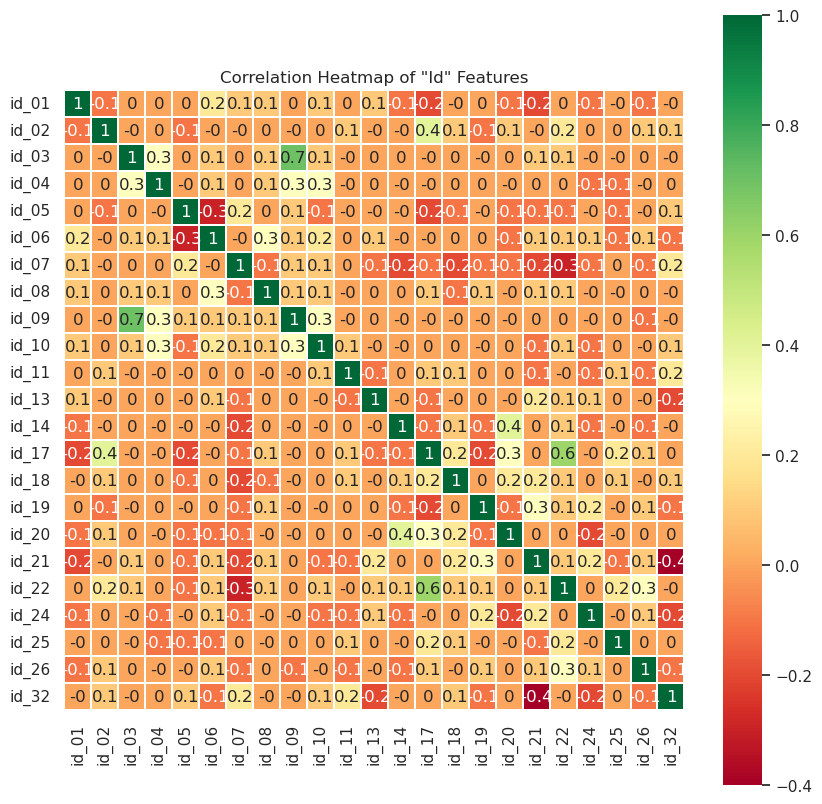

In [232]:
plt.figure(figsize=(10,10))

# Plot heatmap of correlations
ax = sns.heatmap(Id_Cols_corr.round(1), linewidths=.2, cmap="RdYlGn", annot=True, square=True)
ax.set_title('Correlation Heatmap of "Id" Features')
# ax.get_ylim()
ax.set_ylim(23, 0)

In [233]:
id30_fraud = train.groupby('id_30')['isFraud'].agg(['mean','count']).reset_index().rename(columns={'id_30':'id_30','mean' : 'Fraud Rate','count' : 'Counts'}).sort_values(by='Fraud Rate',ascending=False)

In [235]:
print(id30_fraud.to_string())

               id_30  Fraud Rate  Counts
74             other    0.600000      15
4      Android 5.1.1    0.288571     350
1      Android 4.4.2    0.253968      63
71        iOS 11.4.0    0.200000       5
58        iOS 11.0.1    0.196850     127
61        iOS 11.1.0    0.177122     271
67        iOS 11.2.5    0.121667    1200
9      Android 7.1.2    0.121212      33
66        iOS 11.2.2    0.117517     902
44         Windows 8    0.116667     180
26  Mac OS X 10_12_1    0.113636      44
8      Android 7.1.1    0.106349     630
0            Android    0.105653    1079
46     Windows Vista    0.093496     246
57        iOS 11.0.0    0.090278     144
53        iOS 10.2.1    0.087719     285
6      Android 6.0.1    0.084806     566
64        iOS 11.2.0    0.084507     852
52        iOS 10.2.0    0.080537     149
59        iOS 11.0.2    0.078313     166
12             Linux    0.074824    1136
62        iOS 11.1.1    0.070000     700
45       Windows 8.1    0.069488    1914
69        iOS 11

In [236]:
id31_fraud = train.groupby('id_31')['isFraud'].agg(['mean','count']).reset_index().rename(columns={'id_31':'id_31','mean' : 'Fraud Rate','count' : 'Counts'}).sort_values(by='Fraud Rate',ascending=False)

In [237]:
print(id31_fraud.to_string())

                              id_31  Fraud Rate  Counts
9                   Mozilla/Firefox    1.000000       5
89                        icedragon    1.000000       5
65                           comodo    0.666667       6
6                       Lanix/Ilium    0.666667       3
23          chrome 49.0 for android    0.547170      53
103                           opera    0.481928      83
108                   opera generic    0.448718      78
27          chrome 52.0 for android    0.381579     152
104                      opera 49.0    0.311594     138
122             samsung browser 5.4    0.302326      43
96                           mobile    0.272727      11
59                      chrome 67.0    0.272727      33
36                      chrome 58.0    0.271277     188
105                      opera 51.0    0.265306      49
20          chrome 43.0 for android    0.263889      72
24          chrome 50.0 for android    0.262069     145
121             samsung browser 5.2    0.243902 

In [238]:
Device_cols = similar_cols[11]
Device_cols

['DeviceType', 'DeviceInfo']

In [239]:
train[Device_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   DeviceType  140810 non-null  object
 1   DeviceInfo  118666 non-null  object
dtypes: object(2)
memory usage: 9.0+ MB


In [240]:
train[Device_cols].describe()

,DeviceType,DeviceInfo
count,140810,118666
unique,2,1786
top,desktop,Windows
freq,85165,47722


In [241]:
train['DeviceType'].unique()

array([nan, 'mobile', 'desktop'], dtype=object)

In [242]:
train['DeviceType'].value_counts(dropna=False)

DeviceType
NaN        449730
desktop     85165
mobile      55645
Name: count, dtype: int64

In [243]:
train['DeviceInfo'].value_counts(dropna=False)

DeviceInfo
NaN                   471874
Windows                47722
iOS Device             19782
MacOS                  12573
Trident/7.0             7440
                       ...  
SM-N910T3                  1
9203A Build/MRA58K         1
Z2                         1
ATT                        1
A952                       1
Name: count, Length: 1787, dtype: int64

In [247]:
Device_Type_Fraud = (
    train.groupby('DeviceType')['isFraud']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'DeviceType': 'Device Type', 'mean': 'Fraud Rate', 'count': 'Counts'})
    .sort_values(by='Fraud Rate', ascending=False)
)

In [248]:
Device_Type_Fraud

,Device Type,Fraud Rate,Counts
1,mobile,0.101662,55645
0,desktop,0.065215,85165


In [249]:
Device_Info_Fraud = (
    train.groupby('DeviceInfo')['isFraud']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'DeviceInfo': 'Device Info', 'mean': 'Fraud Rate', 'count': 'Counts'})
    .sort_values(by='Fraud Rate', ascending=False)
)

In [251]:
print(Device_Info_Fraud.to_string())

                                      Device Info  Fraud Rate  Counts
315                      G3123 Build/40.0.A.6.175    1.000000      12
1689                            Z835 Build/NMF26V    1.000000      25
810                                         NOKIA    1.000000      10
813                                     NX785QC8G    1.000000       1
808                            N9560 Build/NMF26F    1.000000       1
803                   MotoG3-TE Build/MPD24.65-33    1.000000       5
235                                         Dream    1.000000       4
187                         Blade L3 Build/KOT49H    1.000000      12
894                       RCT6203W46 Build/KOT49H    1.000000       9
906                   RNE-L23 Build/HUAWEIRNE-L23    1.000000       5
501                    LG-D693n Build/KOT49I.V10a    1.000000       1
1465                                      SM-T530    1.000000       1
1540                                         TAB7    1.000000       2
1448                

In [253]:
train[Device_cols].isnull().mean()

DeviceType    0.761557
DeviceInfo    0.799055
dtype: float64

In [254]:
pd.to_pickle(train,'data_updated.pkl')